## 导入需要的包，并挂载Google Driver
- 授课工具包的路径：'/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Tools'

In [2]:
# 挂载自己的Google driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import sys
sys.path.append(r'/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Tools') 
import toolbox_02450
print(toolbox_02450.__version__)

ModuleNotFoundError: No module named 'toolbox_02450'

# 第2章

## Exercise 2.1
- Dataset is nanonose

In [4]:
import numpy as np
import xlrd
from IPython.display import HTML, display
import tabulate
doc = xlrd.open_workbook('/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/nanonose.xls').sheet_by_index(0)

In [5]:

attributeNames = doc.row_values(0, 3, 11) # 提取第0行的3-10的数据
print('属性：',attributeNames)
# Extract class names to python list,
# then encode with integers (dict)
classLabels = doc.col_values(0, 2, 92) # 提取第0列的2-91行
print('分类结果：',classLabels)
classNames = sorted(set(classLabels))
print('类别(分类去重)：',classNames)
classDict = dict(zip(classNames, range(5)))
# Extract vector y, convert to NumPy array
y = np.asarray([classDict[value] for value in classLabels]) # 把分类结果转码成数字
# Preallocate memory, then extract excel data to matrix X
X = np.empty((90, 8)) # 90个样本，8个属性
for i, col_id in enumerate(range(3, 11)):
    X[:, i] = np.asarray(doc.col_values(col_id, 2, 92)) # xlrd和numpy和索引方式不一样
# Compute values of N, M and C.
N = len(y) # 样本数量
M = len(attributeNames) # 属性
C = len(classNames) # 标签
print('Ran Exercise 2.1.1')

属性： ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
分类结果： ['Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Ethanol', 'Ethanol', 'Ethanol', 'Ethanol', 'Ethanol', 'Ethanol', 'Ethanol', 'Ethanol', 'Ethanol', 'Ethanol', 'Ethanol', 'Ethanol', 'Ethanol', 'Ethanol', 'Ethanol', 'Ethanol', 'Ethanol', 'Ethanol', 'Acetone', 'Acetone', 'Acetone', 'Acetone', 'Acetone', 'Acetone', 'Acetone', 'Acetone', 'Acetone', 'Acetone', 'Acetone', 'Acetone', 'Acetone', 'Acetone', 'Acetone', 'Acetone', 'Acetone', 'Acetone', 'Heptane', 'Heptane', 'Heptane', 'Heptane', 'Heptane', 'Heptane', 'Heptane', 'Heptane', 'Heptane', 'Heptane', 'Heptane', 'Heptane', 'Heptane', 'Heptane', 'Heptane', 'Heptane', 'Heptane', 'Heptane', 'Pentanol', 'Pentanol', 'Pentanol', 'Pentanol', 'Pentanol', 'Pentanol', 'Pentanol', 'Pentanol', 'Pentanol', 'Pentanol', 'Pentanol', 'Pentanol', 'Pentanol', 'Pentanol', 'Pentanol', 'Pentanol', 

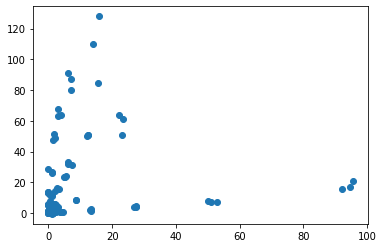

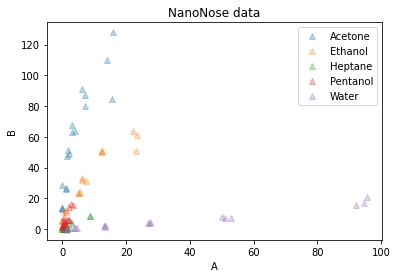

Ran Exercise 2.1.2


In [6]:
from scipy.linalg import svd
from matplotlib.pyplot import figure, plot, title, legend, xlabel, ylabel, show
# help(svd)
# Data attributes to be plotted
i = 0
j = 1
#
# Make a simple plot of the i'th attribute against the j'th attribute
# Notice that X is of matrix type (but it will also work with a numpy array)
# X = np.array(X) # Try to uncomment this line
# 查看 前两个属性的散点图 
plot(X[:, i], X[:, j], 'o')
# %%
# Make another more fancy plot that includes legend, class labels, 
# attribute names, and a title.
# 
f = figure()
title('NanoNose data')
# 接上一部分，C是标签的数量，接上一部分
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plot(X[class_mask,i], X[class_mask,j], '^',alpha=.3)
legend(classNames)
xlabel(attributeNames[i])
ylabel(attributeNames[j])

# Output result to screen
show()
print('Ran Exercise 2.1.2')

[698.81115865 271.1791264  177.03162195 165.81775197 104.7422797
  75.27403086  44.63527635  16.74700977] <class 'numpy.ndarray'> 8
[7.63479014e-01 1.14971436e-01 4.89980885e-02 4.29872326e-02
 1.71522653e-02 8.85865497e-03 3.11482676e-03 4.38482221e-04] <class 'numpy.ndarray'> 8


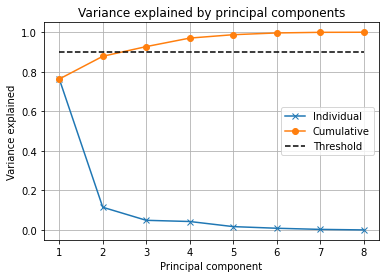

Ran Exercise 2.1.3


In [7]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(axis=0)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)
print(S,type(S), len(S)) # S返回一个np列表，长度跟属性相同

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 
print(rho, type(rho), len(rho))

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')                  # 绘制各在成分上投影的方差
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')       # 绘制各成分累加的可解释变异或课解释方差
plt.plot([1,len(rho)],[threshold, threshold],'k--')     # 绘制压缩要求阈值
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

print('Ran Exercise 2.1.3')

[ 9.46526667 20.32723426 10.49826759 23.43004173 27.7141458  15.32181649
 16.02610424 20.09403086]


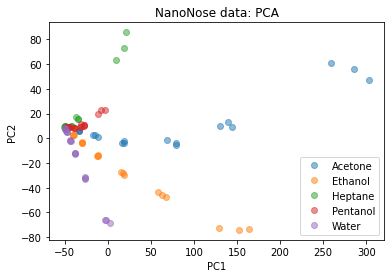

Ran Exercise 2.1.4


In [8]:
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, show, legend
from scipy.linalg import svd

# Subtract mean value from 
print(X.mean(0))                  # N是样本数目
Y = X - np.ones((N,1))*X.mean(0)  # axis0代表对各行的对应数据进行操作

# PCA by computing SVD of Y
U,S,Vh = svd(Y,full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T    

# Project the centered data onto principal component space
Z = Y @ V # 在各成分上的投影，8各成分

# Indices of the principal components to be plotted
i = 0 # 第一主成分
j = 1 # 第二主成分

# Plot PCA of the data
f = figure()
title('NanoNose data: PCA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
legend(classNames)
xlabel('PC{0}'.format(i+1))
ylabel('PC{0}'.format(j+1))

# Output result to screen
show()

print('Ran Exercise 2.1.4')

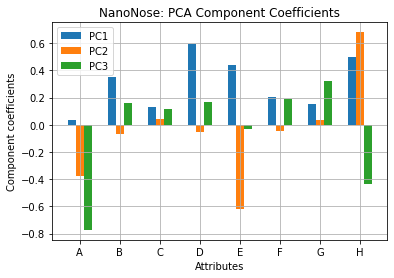

PC2:
[-0.37748501 -0.06817937  0.04400371 -0.0517022  -0.61774564 -0.04367017
  0.035871    0.680767  ]
First water observation
[ 86.03473333   0.67276574  -4.49826759 -11.48773404  36.42046959
   6.17674351 -10.45826424 -18.91989586]
...and its projection onto PC2
-68.15020514949512


In [9]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

Y = X - np.ones((N,1))*X.mean(0)
U,S,Vh = svd(Y,full_matrices=False)
V=Vh.T
N,M = X.shape # N是样本，M是属性

# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0,1,2]# 选择前三成分
legendStrs = ['PC'+str(e+1) for e in pcs] # 图表说明
c = ['r','g','b'] 
bw = .2 # 柱线图宽度
r = np.arange(1,M+1)
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, attributeNames) # 三色柱的中线处画属性的索引
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('NanoNose: PCA Component Coefficients')
plt.show()

# Inspecting the plot, we see that the 2nd principal component has large
# (in magnitude) coefficients for attributes A, E and H. We can confirm
# this by looking at it's numerical values directly, too:
print('PC2:')
print(V[:,1].T)

# How does this translate to the actual data and its projections?
# Looking at the data for water:

# Projection of water class onto the 2nd principal component.
all_water_data = Y[y==4,:]

print('First water observation')
print(all_water_data[0,:])

# Based on the coefficients and the attribute values for the observation
# displayed, would you expect the projection onto PC2 to be positive or
# negative - why? Consider *both* the magnitude and sign of *both* the
# coefficient and the attribute!

# You can determine the projection by (remove comments):
print('...and its projection onto PC2')
print(all_water_data[0,:]@V[:,1])
# Try to explain why?

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23646 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24212 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_

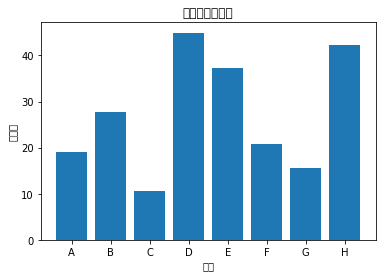

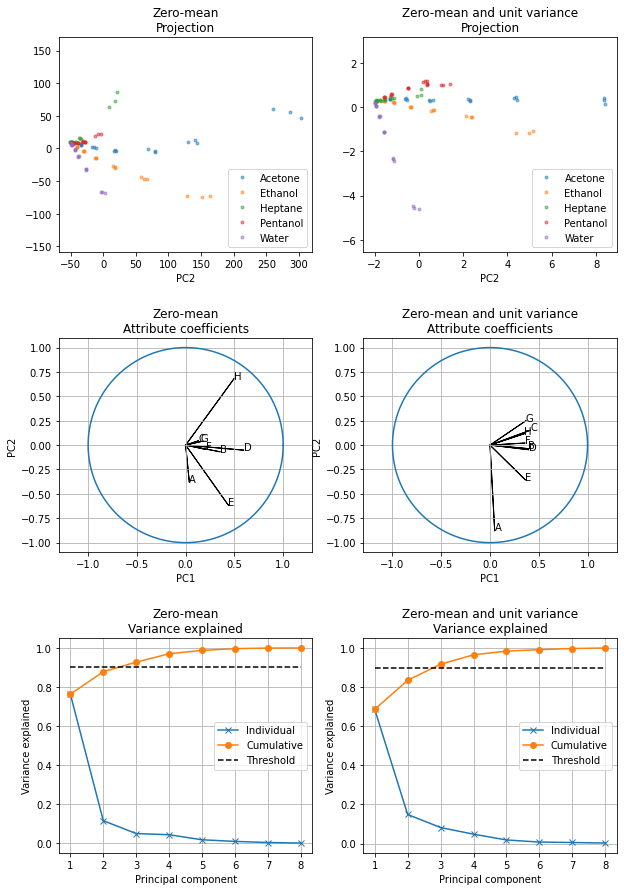

In [10]:
import matplotlib.pyplot as plt
from scipy.linalg import svd
# plt.rcParams['figure.dpi'] = 200 #分辨率
r = np.arange(1,X.shape[1]+1) # 属性
plt.bar(r, np.std(X,0)) # 对每行数据进行处理
plt.xticks(r, attributeNames)
plt.ylabel('标准差')
plt.xlabel('属性')
plt.title("各属性对应方差")

## Investigate how standardization affects PCA

# Try this *later* (for last), and explain the effect
#X_s = X.copy() # Make a to be "scaled" version of X
#X_s[:, 2] = 100*X_s[:, 2] # Scale/multiply attribute C with a factor 100
# Use X_s instead of X to in the script below to see the difference.
# Does it affect the two columns in the plot equally?


# Subtract the mean from the data
Y1 = X - np.ones((N, 1))*X.mean(0)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1))*X.mean(0)
Y2 = Y2*(1/np.std(Y2,0))
# Here were utilizing the broadcasting of a row vector to fit the dimensions 
# of Y2

# Store the two in a cell, so we can just loop over them:
Ys = [Y1, Y2]
titles = ['Zero-mean', 'Zero-mean and unit variance']
threshold = 0.9
# Choose two PCs to plot (the projection)
i = 0
j = 1

# Make the plot
plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=.4)
plt.title('NanoNose: Effect of standardization')
nrows=3
ncols=2
for k in range(2):
    # Obtain the PCA solution by calculate the SVD of either Y1 or Y2
    U,S,Vh = svd(Ys[k],full_matrices=False)
    V=Vh.T # For the direction of V to fit the convention in the course we transpose
    # For visualization purposes, we flip the directionality of the
    # principal directions such that the directions match for Y1 and Y2.
    if k==1: V = -V; U = -U; 
    
    # Compute variance explained
    rho = (S*S) / (S*S).sum() 
    
    # Compute the projection onto the principal components
    Z = U*S;
    
    # Plot projection
    plt.subplot(nrows, ncols, 1+k)
    C = len(classNames)
    for c in range(C):
        plt.plot(Z[y==c,i], Z[y==c,j], '.', alpha=.5)
    plt.xlabel('PC'+str(i+1))
    plt.xlabel('PC'+str(j+1))
    plt.title(titles[k] + '\n' + 'Projection' )
    plt.legend(classNames)
    plt.axis('equal')
    
    # Plot attribute coefficients in principal component space
    plt.subplot(nrows, ncols,  3+k)
    for att in range(V.shape[1]):
        plt.arrow(0,0, V[att,i], V[att,j])
        plt.text(V[att,i], V[att,j], attributeNames[att])
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel('PC'+str(i+1))
    plt.ylabel('PC'+str(j+1))
    plt.grid()
    # Add a unit circle
    plt.plot(np.cos(np.arange(0, 2*np.pi, 0.01)), 
         np.sin(np.arange(0, 2*np.pi, 0.01)));
    plt.title(titles[k] +'\n'+'Attribute coefficients')
    plt.axis('equal')
            
    # Plot cumulative variance explained
    plt.subplot(nrows, ncols,  5+k);
    plt.plot(range(1,len(rho)+1),rho,'x-')
    plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
    plt.plot([1,len(rho)],[threshold, threshold],'k--')
    plt.title('Variance explained by principal components');
    plt.xlabel('Principal component');
    plt.ylabel('Variance explained');
    plt.legend(['Individual','Cumulative','Threshold'])
    plt.grid()
    plt.title(titles[k]+'\n'+'Variance explained')

plt.show()
        
         

## Exercise 2.2
- Dataset is zipdata.mat

### 2.2.1


In [ ]:
from matplotlib.pyplot import (figure, subplot, imshow, xlabel, title, 
yticks, show,cm)
from scipy.io import loadmat
import numpy as np

# Index of the digit to display
i = 0

# Load Matlab data file to python dict structure
mat_data = loadmat('/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/zipdata.mat')

# Extract variables of interest
testdata = mat_data['testdata']
traindata = mat_data['traindata']
X = traindata[:,1:]
y = traindata[:,0]


# Visualize the i'th digit as a vector
f = figure()
subplot(4,1,4);
imshow(np.expand_dims(X[i,:],axis=0), extent=(0,256,0,10), cmap=cm.gray_r);
xlabel('Pixel number');
title('Digit in vector format');
yticks([])

# Visualize the i'th digit as an image
subplot(2,1,1);
I = np.reshape(X[i,:],(16,16))
imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
title('Digit as an image');

show()

print('Ran Exercise 2.2.1')

### 2.2.2

In [ ]:
from matplotlib.pyplot import (figure, subplot, plot, xlabel, ylabel, title, 
yticks, show,legend,imshow, cm)
from scipy.io import loadmat
import scipy.linalg as linalg
import numpy as np
import tabulate
from IPython.display import display, HTML

# Digits to include in analysis (to include all, n = range(10) )
n = [0,1]
# Number of principal components for reconstruction
K = 16
# Digits to visualize 要进行压缩再复原展示的图片数量
nD = range(6); 


# Load Matlab data file to python dict structure
# and extract variables of interest
traindata = loadmat('/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/zipdata.mat')['traindata']
X = traindata[:,1:] # 样本
y = traindata[:,0] # 标签

N,M = X.shape
C = len(n)

classValues = n
classNames = [str(num) for num in n]
classDict = dict(zip(classNames,classValues))
# html输出样本参数
table = [
        ['项目','数值'],
        ["集合名称",'zipdata.mat'],
        ["样本数量",N],
        ["属性数量",M],
        ["分类数量",C],
        ["分类类别",classNames],
        ["压缩阈值",'90%']
        ]
display(HTML(tabulate.tabulate(table, headers='firstrow', showindex=True, tablefmt='html')))

# Select subset of digits classes to be inspected
class_mask = np.zeros(N).astype(bool)
for v in n:
    cmsk = (y == v) # 返回的是y列表中值为v的所有项的索引，类型为list
    class_mask = class_mask | cmsk
X = X[class_mask,:]
y = y[class_mask]
N=X.shape[0]

# Center the data (subtract mean column values)
Xc = X - np.ones((N,1))*X.mean(0)

# PCA by computing SVD of Y
U,S,V = linalg.svd(Xc,full_matrices=False)
#U = mat(U)
V = V.T

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

# Project data onto principal component space
Z = Xc @ V

# Plot variance explained 绘制可解释变异
figure()
plot(rho,'o-')
title('Variance explained by principal components');
xlabel('Principal component');
ylabel('Variance explained value');


# Plot PCA of the data 绘制2主成分时的散点图
f = figure()
title('pixel vectors of handwr. digits projected on PCs')
for c in n:
    # select indices belonging to class c:
    class_mask = (y == c) # 筛选标签不同的各类样本，以用不同颜色进行区分，并搭配图例
    plot(Z[class_mask,0], Z[class_mask,1], 'o')
legend(classNames)
xlabel('PC1')
ylabel('PC2')


# Visualize the reconstructed data from the first K principal components
# 对选用K个主成分压缩后图片，复原后进行可视化
# Select randomly D digits. 随机选取一些样本
figure(figsize=(10,3)) #
W = Z[:,range(K)] @ V[:,range(K)].T # 选取前K个主成分压缩后的数据进行复原
D = len(nD) # 前面定义了nd = range(6)，即本次要随机复原哪几张图片
for d in range(D):
    digit_ix = np.random.randint(0,N)
    subplot(2, D, d+1) # 为什么要+1，因为subbplot是从1开始计数索引的
    I = np.reshape(X[digit_ix,:], (16,16))
    imshow(I, cmap=cm.Blues)
    title('Original')
    subplot(2, D, D+d+1) # 复原后图片的展示位置
    I = np.reshape(W[digit_ix,:]+X.mean(0), (16,16)) # 当时处理原始数据时坐标系归零了
    imshow(I, cmap=cm.Greens)
    title('Reconstr.');

# Visualize the pricipal components，K为选取的主成分
figure(figsize=(8,6))
for k in range(K):
    N1 = np.ceil(np.sqrt(K)); N2 = np.ceil(K/N1) 
    subplot(N2, N1, k+1)
    I = np.reshape(V[:,k], (16,16)) # 绘制前K=16个特征向量
    imshow(I, cmap=cm.Oranges)
    title('PC{0}'.format(k+1));

# output to screen
show()

print('Ran Exercise 2.2.2')

### 显示特征向量

In [2]:
Data_header = ['PC'+str(i+1) for i in range(256)]
display(HTML('<h1>Show all feature vectors (Feature matrix)</h1>' + tabulate.tabulate(V, headers = Data_header, showindex=True, tablefmt='html')))

NameError: name 'HTML' is not defined

## Exercise 2.3
- Dataset is zipdata.mat

In [3]:
from matplotlib.pyplot import figure, plot, xlabel, ylabel, show
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
import scipy.linalg as linalg
import numpy as np
# Number of principal components to use for classification,
# i.e. the reduced dimensionality
K = [8,10,15,20,30,40,50,60,100,150]
# Load Matlab data file and extract training set and test set
mat_data = loadmat('/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/zipdata.mat')
X = mat_data['traindata'][:,1:]                         # 从数据仓中分离训练样本
y = mat_data['traindata'][:,0]                          # 从数据仓中分离训练标签
Xtest = mat_data['testdata'][:,1:]                      # 从数据仓中分离测试样本
ytest = mat_data['testdata'][:,0]                       # 从数据仓中分离测试标签
N,M = X.shape                                           # N,M 训练集的样本数量和属性维度
Ntest = Xtest.shape[0] # or Xtest[:,0].shape            # Ntest测试集样本数量
# Subtract the mean from the data
Y = X - np.ones((N,1))*X.mean(0)                        # 训练集归一，数据分布置于原点
Ytest = Xtest - np.ones((Ntest,1))*X.mean(0)            # 测试集归一，数据分布置于原点
# Obtain the PCA solution  by calculate the SVD of Y
U,S,V = linalg.svd(Y,full_matrices=False)               # PCA计算
V = V.T                                                 # 转置特征向量
# Repeat classification for different values of K
error_rates = []                                        # 错误率
for k in K:                                             # 逐渐递增选择的主成分数量从8到150
    # Project data onto principal component space,
    Z = Y @ V[:,:k]                                     # 投影到k个主成分上压缩训练集
    Ztest = Ytest @ V[:,:k]                             # 投影到k个主成分上压缩测试集
    # Classify data with knn classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=1)
    knn_classifier.fit(Z,y.ravel())                     # ravel flatten squeeze都能把数据碾平
    y_estimated = knn_classifier.predict(Ztest)         # 对测试集进行推理
    # Compute classification error rates
    y_estimated = y_estimated.T                         # 行向量变列向量
    er = (sum(ytest!=y_estimated)/float(len(ytest)))*100# 错误推理数据占总测试样本的比例
    error_rates.append(er)                              # 记录本次选择的主成份下的错误率
    print('K={0}: Error rate: {1:.1f}%'.format(k, er))
# Visualize error rates vs. number of principal components considered
figure()
plot(K,error_rates,'o-')
xlabel('Number of principal components K')
ylabel('Error rate [%]')
show()

print('Ran Exercise 2.3.1')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/zipdata.mat'

# 第3章

## Exercise 3.1
- Dataset is textDocs.txt
- 路径：/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/textDocs.txt

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Load the textDocs.txt as a long string into raw_file:
with open('/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/textDocs.txt', 'r') as f:
    raw_file = f.read()
# raw_file contains sentences seperated by newline characters, 
# so we split by '\n':
corpus = raw_file.split('\n')
# corpus is now list of "documents" (sentences), but some of them are empty, 
# because textDocs.txt has a lot of empty lines, we filter/remove them:
corpus = list(filter(None, corpus))

# Display the result
print('Document-term matrix analysis')
print()
print('Corpus (5 documents/sentences):')
print(np.asmatrix(corpus))
print()


# To automatically obtain the bag of words representation, we use sklearn's
# feature_extraction.text module, which has a function CountVectorizer.
# We make a CounterVectorizer:
vectorizer = CountVectorizer(token_pattern=r'\b[^\d\W]+\b')   
# The token pattern is a regular expression (marked by the r), which ensures 
# that the vectorizer ignores digit/non-word tokens - in this case, it ensures 
# the 10 in the last document is not recognized as a token. It's not important
# that you should understand it the regexp.

# The object vectorizer can now be used to first 'fit' the vectorizer to the
# corpus, and the subsequently transform the data. We start by fitting:
vectorizer.fit(corpus)
# The vectorizer has now determined the unique terms (or tokens) in the corpus
# and we can extract them using:
attributeNames = vectorizer.get_feature_names()
print('Found terms:')
print(attributeNames)
print()

# The next step is to count how many times each term is found in each document,
# which we do using the transform function:
X = vectorizer.transform(corpus)
N,M = X.shape
print('Number of documents (data objects, N):\t %i' % N)
print('Number of terms (attributes, M):\t %i' % M )
print()
print('Document-term matrix:')
print(X.toarray())
print()
print('Ran Exercise 3.1.2')

Document-term matrix analysis

Corpus (5 documents/sentences):
[['The Google matrix P is a model of the internet'
  'P_ij is nonzero if there is a link from webpage i to j'
  'The Google matrix is used to rank all Web pages'
  'The ranking is done by solving a matrix eigenvalue problem'
  'England dropped out of the top 10 in the FIFA ranking']]

Found terms:
['a', 'all', 'by', 'done', 'dropped', 'eigenvalue', 'england', 'fifa', 'from', 'google', 'i', 'if', 'in', 'internet', 'is', 'j', 'link', 'matrix', 'model', 'nonzero', 'of', 'out', 'p', 'p_ij', 'pages', 'problem', 'rank', 'ranking', 'solving', 'the', 'there', 'to', 'top', 'used', 'web', 'webpage']

Number of documents (data objects, N):	 5
Number of terms (attributes, M):	 36

Document-term matrix:
[[1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 1 1 0 0 2 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0]
 [1 0 1 1 0 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# As before, load the corpus and preprocess:
with open('/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/textDocs.txt', 'r') as f:
    raw_file = f.read()
corpus = raw_file.split('\n')
corpus = list(filter(None, corpus))

# Load and process the stop words in a similar manner:
with open('/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/stopWords.txt', 'r') as f:
    raw_file = f.read()
stopwords = raw_file.split('\n')

# When making the CountVectorizer, we now input the stop words:
vectorizer = CountVectorizer(token_pattern=r'\b[^\d\W]+\b', 
                             stop_words=stopwords)    
# Determine the terms in the corpus
vectorizer.fit(corpus)
# ... and count the frequency of each term within a document:
X = vectorizer.transform(corpus)
attributeNames = vectorizer.get_feature_names()
N,M = X.shape

# Display the result
print('Document-term matrix analysis (using stop words)')
print()
print('Number of documents (data objects, N):\t %i' % N)
print('Number of terms (attributes, M):\t %i' % M )
print()
print('Found terms (no stop words):')
print(attributeNames)
print()
print('Document-term matrix:')
print(X.toarray())
print()
print('Ran Exercise 3.1.3')

Document-term matrix analysis (using stop words)

Number of documents (data objects, N):	 5
Number of terms (attributes, M):	 19

Found terms (no stop words):
['dropped', 'eigenvalue', 'england', 'fifa', 'google', 'internet', 'link', 'matrix', 'model', 'nonzero', 'p_ij', 'pages', 'problem', 'rank', 'ranking', 'solving', 'top', 'web', 'webpage']

Document-term matrix:
[[0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0]
 [1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]]

Ran Exercise 3.1.3


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# We'll use a widely used stemmer based:
# Porter, M. “An algorithm for suffix stripping.” Program 14.3 (1980): 130-137.
# The stemmer is implemented in the most used natural language processing
# package in Python, "Natural Langauge Toolkit" (NLTK):
from nltk.stem import PorterStemmer

# Load and process the corpus and stop words:
with open('/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/textDocs.txt', 'r') as f:
    raw_file = f.read()
corpus = raw_file.split('\n')
corpus = list(filter(None, corpus))

with open('/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/stopWords.txt', 'r') as f:
    raw_file = f.read()
stopwords = raw_file.split('\n')

# To enable stemming when using the sklearn-module, we need to parse an 
# "analyzer" to the vectorizer we've been using. 
# First, we make an object based on the PorterStemmer class, and we also make
# an analyzer object:
stemmer = PorterStemmer()
analyzer = CountVectorizer(token_pattern=r'\b[^\d\W]+\b', 
                           stop_words=stopwords).build_analyzer()
# Using these we'll make a function that can stem words:
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))
# ... and finally, we make a vectorizer just like we've done before:
vectorizer = CountVectorizer(analyzer=stemmed_words)    

# Determine the terms:
vectorizer.fit(corpus)
attributeNames = vectorizer.get_feature_names()

# ... and count the occurences:
X = vectorizer.transform(corpus)
N,M = X.shape
X = X.toarray()

# Display the result
print('Document-term matrix analysis (using stop words and stemming)')
print()
print('Number of documents (data objects, N):\t %i' % N)
print('Number of terms (attributes, M):\t %i' % M )
print()
print('Found terms (no stop words, stemmed):')
print(attributeNames)
print()
print('Document-term matrix:')
print(X)
print()
print('Ran Exercise 3.1.4')
print()

Document-term matrix analysis (using stop words and stemming)

Number of documents (data objects, N):	 5
Number of terms (attributes, M):	 18

Found terms (no stop words, stemmed):
['drop', 'eigenvalu', 'england', 'fifa', 'googl', 'internet', 'link', 'matrix', 'model', 'nonzero', 'p_ij', 'page', 'problem', 'rank', 'solv', 'top', 'web', 'webpag']

Document-term matrix:
[[0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0]
 [1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0]]

Ran Exercise 3.1.4



In [ ]:
import numpy as np
import scipy.linalg as linalg
from toolbox_02450.similarity import similarity
# Query vector
q = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])
# notice, that you could get the query vector using the vectorizer, too:
#q = vectorizer.transform(['matrix rank solv'])
#q = np.asarray(q.toarray())
# or use any other string:
#q = vectorizer.transform(['Can I Google how to fix my problem?'])
#q = np.asarray(q.toarray())

# Method 1 ('for' loop - slow)
N = np.shape(X)[0]; # get the number of data objects
sim = np.zeros((N,1)) # allocate a vector for the similarity
for i in range(N):
    x = X[i,:] # Get the i'th data object (here: document)
    sim[i] = q/linalg.norm(q) @ x.T/linalg.norm(x) # Compute cosine similarity

# Method 2 (one line of code with no iterations - faster)
sim = (q @ X.T).T / (np.sqrt(np.power(X,2).sum(axis=1)) * np.sqrt(np.power(q,2).sum()))

# Method 3 (use the "similarity" function)
sim = similarity(X, q, 'cos');


# Display the result
print('Query vector:\n {0}\n'.format(q))
print('Similarity results:\n {0}'.format(sim))

print('Ran Exercise 3.1.5')

Query vector:
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0]

Similarity results:
 [[0.28867513]
 [0.        ]
 [0.51639778]
 [0.77459667]
 [0.25819889]]
Ran Exercise 3.1.5


## Exercise 3.2

In [ ]:
# exercise 3.2.1
import numpy as np

x = np.array([-0.68, -2.11, 2.39, 0.26, 1.46, 1.33, 1.03, -0.41, -0.33, 0.47])

# Compute values
mean_x = x.mean()
std_x = x.std(ddof=1)
median_x = np.median(x)
range_x = x.max()-x.min()

# Display results
print('Vector:',x)
print('Mean:',mean_x)
print('Standard Deviation:',std_x)
print('Median:',median_x)
print('Range:',range_x)

print('Ran Exercise 3.2.1')

Vector: [-0.68 -2.11  2.39  0.26  1.46  1.33  1.03 -0.41 -0.33  0.47]
Mean: 0.341
Standard Deviation: 1.2905937479401572
Median: 0.365
Range: 4.5
Ran Exercise 3.2.1


In [ ]:
# exercise 3.2.2

import numpy as np
from toolbox_02450.similarity import similarity

# Generate two data objects with M random attributes
M = 5;
x = np.random.rand(1,M)
y = np.random.rand(1,M)

# Two constants
a = 1.5
b = 1.5

# Check the statements in the exercise
print("Cosine scaling: %.4f " % (similarity(x,y,'cos') - similarity(a*x,y,'cos'))[0,0])
print("ExtendedJaccard scaling: %.4f " % (similarity(x,y,'ext') - similarity(a*x,y,'ext'))[0,0])
print("Correlation scaling: %.4f " % (similarity(x,y,'cor') - similarity(a*x,y,'cor'))[0,0])
print("Cosine translation: %.4f " % (similarity(x,y,'cos') - similarity(b+x,y,'cos'))[0,0])
print("ExtendedJaccard translation: %.4f " % (similarity(x,y,'ext') - similarity(b+x,y,'ext'))[0,0])
print("Correlation translation: %.4f " % (similarity(x,y,'cor') - similarity(b+x,y,'cor'))[0,0])

print('Ran Exercise 3.2.2')

Cosine scaling: -0.0000 
ExtendedJaccard scaling: 0.1739 
Correlation scaling: -0.0000 
Cosine translation: 0.1179 
ExtendedJaccard translation: 0.4653 
Correlation translation: -0.0000 
Ran Exercise 3.2.2


## Exercise 3.3
- Dataset is 

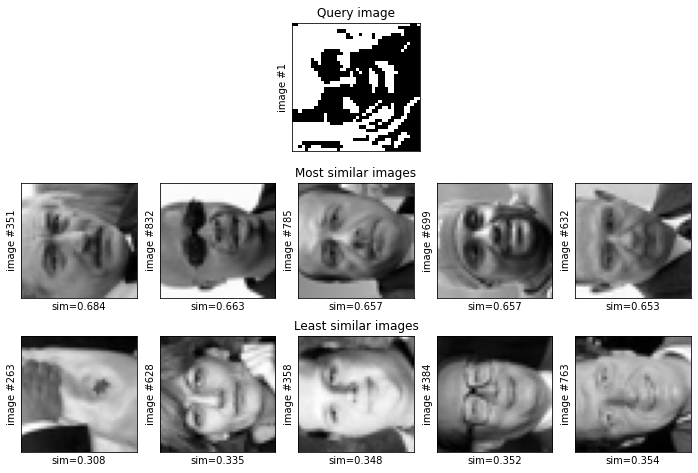

Ran Exercise 3.3.1


In [ ]:
# exercise 3.3.1

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from toolbox_02450.similarity import similarity

# Image to use as query
i = 1

# Similarity: 'SMC', 'Jaccard', 'ExtendedJaccard', 'Cosine', 'Correlation' 
similarity_measure = 'SMC'

# Load the digits
# Load Matlab data file to python dict structure
# X = loadmat('/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/digits.mat')['X']
# You can also try the CBCL faces dataset (remember to change 'transpose')
X = loadmat('/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/wildfaces_grayscale.mat')['X']
N, M = X.shape
transpose = False # should the plotted images be transposed? 


# Search the face database for similar faces
# Index of all other images than i
noti = list(range(0,i)) + list(range(i+1,N)) 
# Compute similarity between image i and all others
sim = similarity(X[i,:], X[noti,:], similarity_measure)
sim = sim.tolist()[0]
# Tuples of sorted similarities and their indices
sim_to_index = sorted(zip(sim,noti))


# Visualize query image and 5 most/least similar images
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)

img_hw = int(np.sqrt(len(X[0])))
img = np.reshape(X[i], (img_hw,img_hw))
if transpose: img = img.T
plt.imshow(img, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Query image')
plt.ylabel('image #{0}'.format(i))


for ms in range(5):

    # 5 most similar images found
    plt.subplot(3,5,6+ms)
    im_id = sim_to_index[-ms-1][1]
    im_sim = sim_to_index[-ms-1][0]
    img = np.reshape(X[im_id],(img_hw,img_hw))
    if transpose: img = img.T
    plt.imshow(img, cmap=plt.cm.gray)
    plt.xlabel('sim={0:.3f}'.format(im_sim))
    plt.ylabel('image #{0}'.format(im_id))
    plt.xticks([]); plt.yticks([])
    if ms==2: plt.title('Most similar images')

    # 5 least similar images found
    plt.subplot(3,5,11+ms)
    im_id = sim_to_index[ms][1]
    im_sim = sim_to_index[ms][0]
    img = np.reshape(X[im_id],(img_hw,img_hw))
    if transpose: img = img.T
    plt.imshow(img, cmap=plt.cm.gray)
    plt.xlabel('sim={0:.3f}'.format(im_sim))
    plt.ylabel('image #{0}'.format(im_id))
    plt.xticks([]); plt.yticks([])
    if ms==2: plt.title('Least similar images')
    
plt.show()

print('Ran Exercise 3.3.1')

In [ ]:
# exercise 3.2.2
import numpy as np
from toolbox_02450.similarity import similarity

# Generate two data objects with M random attributes
M = 5;
x = np.random.rand(1,M)
y = np.random.rand(1,M)

# Two constants
a = 1.5
b = 1.5

# Check the statements in the exercise
print("Cosine scaling: %.4f " % (similarity(x,y,'cos') - similarity(a*x,y,'cos'))[0,0])
print("ExtendedJaccard scaling: %.4f " % (similarity(x,y,'ext') - similarity(a*x,y,'ext'))[0,0])
print("Correlation scaling: %.4f " % (similarity(x,y,'cor') - similarity(a*x,y,'cor'))[0,0])
print("Cosine translation: %.4f " % (similarity(x,y,'cos') - similarity(b+x,y,'cos'))[0,0])
print("ExtendedJaccard translation: %.4f " % (similarity(x,y,'ext') - similarity(b+x,y,'ext'))[0,0])
print("Correlation translation: %.4f " % (similarity(x,y,'cor') - similarity(b+x,y,'cor'))[0,0])

print('Ran Exercise 3.2.2')

Cosine scaling: 0.0000 
ExtendedJaccard scaling: 0.0544 
Correlation scaling: -0.0000 
Cosine translation: 0.0050 
ExtendedJaccard translation: 0.4839 
Correlation translation: -0.0000 
Ran Exercise 3.2.2


# 第4章


## Exercise 4.1

In [ ]:
# exercise 4.1.1

from matplotlib.pyplot import (figure, title, subplot, plot, hist, show)
import numpy as np


# Number of samples
N = 200

# Mean
mu = 17

# Standard deviation
s = 2

# Number of bins in histogram
nbins = 20

# Generate samples from the Normal distribution
X = np.random.normal(mu,s,N).T 
# or equally:
X = np.random.randn(N).T * s + mu

# Plot the samples and histogram
figure(figsize=(12,4))
title('Normal distribution')
subplot(1,2,1)
plot(X,'.')
subplot(1,3,3)
hist(X, bins=nbins)
show()

print('Ran Exercise 4.1.1')

In [ ]:
# exercise 4.1.2

from matplotlib.pyplot import (figure, title, subplot, plot, hist, show)
import numpy as np
# Number of samples
N = 200

# Mean
mu = 17

# Standard deviation
s = 2

# Number of bins in histogram
nbins = 20

# Generate samples from the Normal distribution
X = np.random.normal(mu,s,N).T 
# or equally:
X = np.random.randn(N).T * s + mu

# Plot the samples and histogram
figure()
title('Normal distribution')
subplot(1,2,1)
plot(X,'x')
subplot(1,2,2)
hist(X, bins=nbins)

# Compute empirical mean and standard deviation
mu_ = X.mean()
s_ = X.std(ddof=1)

print("Theoretical mean: ", mu)
print("Theoretical std.dev.: ", s)
print("Empirical mean: ", mu_)
print("Empirical std.dev.: ", s_)

show()

print('Ran Exercise 4.1.2')

In [ ]:
# exercise 4.1.3

from matplotlib.pyplot import (figure, title, subplot, plot, hist, show)
import numpy as np
from scipy import stats

# Number of samples
N = 500

# Mean
mu = 17

# Standard deviation
s = 2

# Number of bins in histogram
nbins = 20

# Generate samples from the Normal distribution
X = np.random.normal(mu,s,N).T 
# or equally:
X = np.random.randn(N).T * s + mu

# Plot the histogram
f = figure()
title('Normal distribution')
hist(X, bins=nbins, density=True)

# Over the histogram, plot the theoretical probability distribution function:
x = np.linspace(X.min(), X.max(), 1000)
pdf = stats.norm.pdf(x,loc=17,scale=2)
plot(x,pdf,'.',color='red')

# Compute empirical mean and standard deviation
mu_ = X.mean()
s_ = X.std(ddof=1)

print("Theoretical mean: ", mu)
print("Theoretical std.dev.: ", s)
print("Empirical mean: ", mu_)
print("Empirical std.dev.: ", s_)

show()

print('Ran Exercise 4.1.3')

In [ ]:
# exercise 4.1.4

import numpy as np

# Number of samples
N = 1000

# Mean
mu = np.array([13, 17])

# Covariance matrix
S = np.array([[4,3],[3,9]])

# Generate samples from the Normal distribution
X = np.random.multivariate_normal(mu, S, N)

print('Ran Exercise 4.1.4')

In [ ]:
# exercise 4.1.5

from matplotlib.pyplot import (figure, title, subplot, plot, hist, show, 
                               xlabel, ylabel, xticks, yticks, colorbar, cm, 
                               imshow, suptitle)
import numpy as np

# Number of samples
N = 1000

# Standard deviation of x1
s1 = 2

# Standard deviation of x2
s2 = 3

# Correlation between x1 and x2
corr = 0.5

# Covariance matrix
S = np.matrix([[s1*s1, corr*s1*s2], [corr*s1*s2, s2*s2]])

# Mean
mu = np.array([13, 17])

# Number of bins in histogram
nbins = 20

# Generate samples from multivariate normal distribution
X = np.random.multivariate_normal(mu, S, N)


# Plot scatter plot of data
figure(figsize=(12,8))
suptitle('2-D Normal distribution')

subplot(1,2,1)
plot(X[:,0], X[:,1], 'x')
xlabel('x1'); ylabel('x2')
title('Scatter plot of data')

subplot(1,2,2)
x = np.histogram2d(X[:,0], X[:,1], nbins)
imshow(x[0], cmap=cm.gray_r, interpolation='None', origin='lower')
colorbar()
xlabel('x1'); ylabel('x2'); xticks([]); yticks([]);
title('2D histogram')

show()

print('Ran Exercise 4.1.5')

In [ ]:
# exercise 4.1.6

from matplotlib.pyplot import (figure, subplot, title, imshow, xticks, yticks, 
                               show, cm)
import scipy.linalg as linalg
from scipy.io import loadmat
import numpy as np

# Digits to include in analysis (to include all: n = range(10))
n = [0]

# Load Matlab data file to python dict structure
# and extract variables of interest
traindata = loadmat('/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/zipdata.mat')['traindata']
X = traindata[:,1:]
y = traindata[:,0]
N, M = X.shape
C = len(n)

# Remove digits that are not to be inspected
class_mask = np.zeros(N).astype(bool)
for v in n:
    cmsk = (y==v)
    class_mask = class_mask | cmsk
X = X[class_mask,:]
y = y[class_mask]
N = np.shape(X)[0]

mu = X.mean(axis=0)
s = X.std(ddof=1, axis=0)
S = np.cov(X, rowvar=0, ddof=1)

figure()
subplot(1,2,1)
I = np.reshape(mu, (16,16))
imshow(I, cmap=cm.gray_r)
title('Mean')
xticks([]); yticks([])
subplot(1,2,2)
I = np.reshape(s, (16,16))
imshow(I, cmap=cm.gray_r)
title('Standard deviation')
xticks([]); yticks([])

show()

print('Ran Exercise 4.1.6')

In [ ]:
# exercise 4.1.7

from matplotlib.pyplot import (figure, subplot, imshow, xticks, yticks, title,
                               cm, show)
import numpy as np
from scipy.io import loadmat

# Digits to include in analysis (to include all, n = range(10) )
n = [1]

# Number of digits to generate from normal distributions
ngen = 10

# Load Matlab data file to python dict structure
# and extract variables of interest
traindata = loadmat('/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/zipdata.mat')['traindata']
X = traindata[:,1:]
y = traindata[:,0]
N, M = np.shape(X) #or X.shape
C = len(n)

# Remove digits that are not to be inspected
class_mask = np.zeros(N).astype(bool)
for v in n:
    cmsk = (y==v)
    class_mask = class_mask | cmsk
X = X[class_mask,:]
y = y[class_mask]
N = np.shape(X)[0] # or X.shape[0]

mu = X.mean(axis=0)
s = X.std(ddof=1, axis=0)
S = np.cov(X, rowvar=0, ddof=1)

# Generate 10 samples from 1-D normal distribution
Xgen = np.random.randn(ngen,256)
for i in range(ngen):
    Xgen[i] = np.multiply(Xgen[i],s) + mu

# Plot images
figure()
for k in range(ngen):
    subplot(2, np.ceil(ngen/2.), k+1)
    I = np.reshape(Xgen[k,:], (16,16))
    imshow(I, cmap=cm.gray_r);
    xticks([]); yticks([])
    if k==1: title('Digits: 1-D Normal')


# Generate 10 samples from multivariate normal distribution
Xmvgen = np.random.multivariate_normal(mu, S, ngen)
# Note if you are investigating a single class, then you may get: 
# """RuntimeWarning: covariance is not positive-semidefinite."""
# Which in general is troublesome, but here is due to numerical imprecission


# Plot images
figure()
for k in range(ngen):
    subplot(2, np.ceil(ngen/2.), k+1)
    I = np.reshape(Xmvgen[k,:], (16,16))
    imshow(I, cmap=cm.gray_r);
    xticks([]); yticks([])
    if k==1: title('Digits: Multivariate Normal')

show()

print('Ran Exercise 4.1.7')

## Exercise 4.2

In [ ]:
# exercise 4.2.1

import numpy as np
import xlrd

# Load xls sheet with data
doc = xlrd.open_workbook('/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/iris.xls').sheet_by_index(0)

# Extract attribute names
attributeNames = doc.row_values(0,0,4)

# Extract class names to python list,
# then encode with integers (dict)
classLabels = doc.col_values(4,1,151)
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames,range(len(classNames))))

# Extract vector y, convert to NumPy matrix and transpose
y = np.array([classDict[value] for value in classLabels])

# Preallocate memory, then extract data to matrix X
X = np.empty((150,4))
for i in range(4):
    X[:,i] = np.array(doc.col_values(i,1,151)).T

# Compute values of N, M and C.
N = len(y)
M = len(attributeNames)
C = len(classNames)

print('Ran Exercise 4.2.1')

Ran Exercise 4.2.1


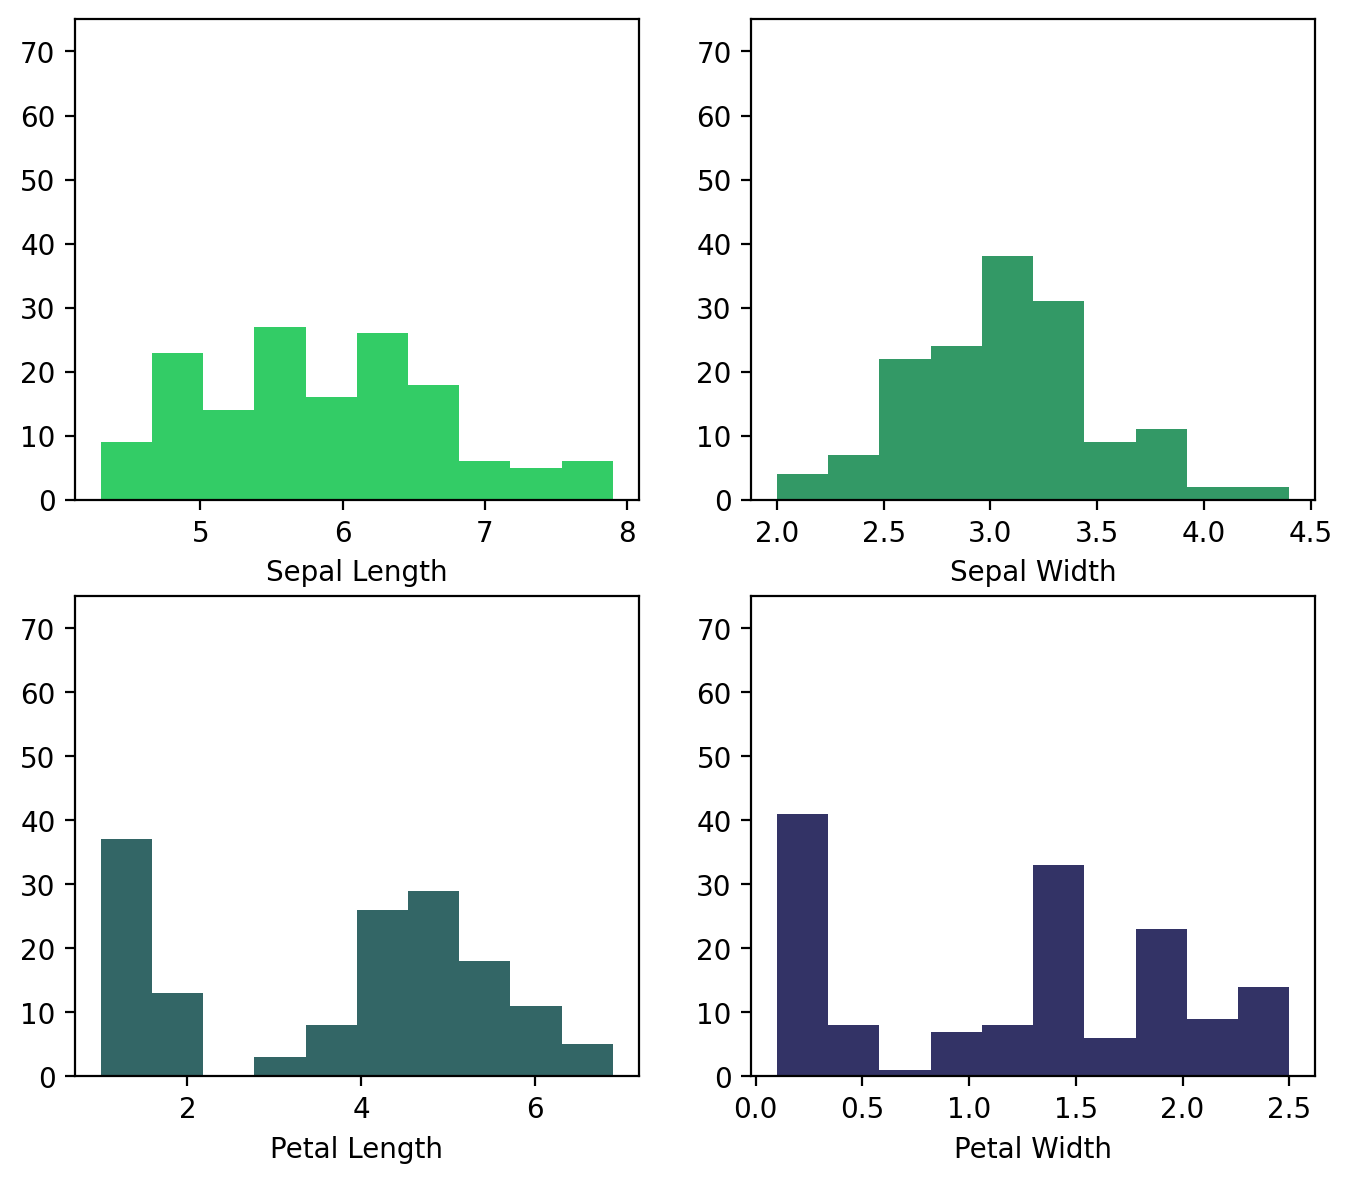

Ran Exercise 4.2.2


In [ ]:
# Exercise 4.2.2

from matplotlib.pyplot import figure, subplot, hist, xlabel, ylim, show
import numpy as np


figure(figsize=(8,7))
u = np.floor(np.sqrt(M)); v = np.ceil(float(M)/u)
for i in range(M):
    subplot(u,v,i+1)
    hist(X[:,i], color=(0.2, 0.8-i*0.2, 0.4))
    xlabel(attributeNames[i])
    ylim(0,N/2)
    
show()

print('Ran Exercise 4.2.2')

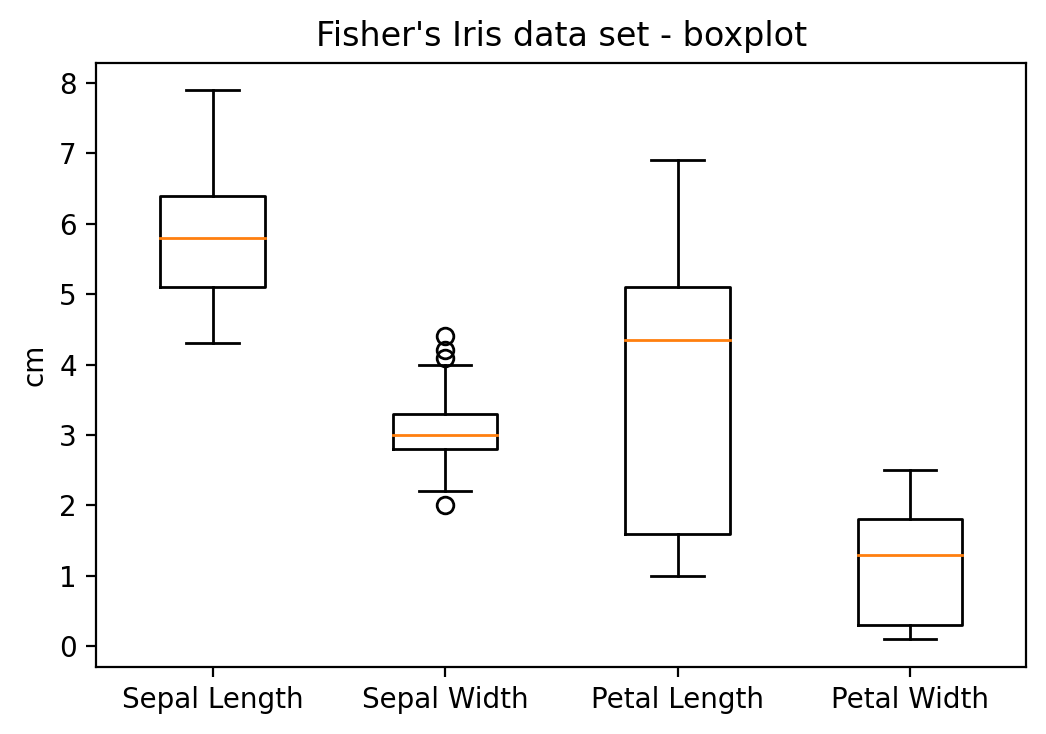

Ran Exercise 4.2.3


In [ ]:
# Exercise 4.2.3

from matplotlib.pyplot import boxplot, xticks, ylabel, title, show

# requires data from exercise 4.2.1

boxplot(X)
xticks(range(1,5),attributeNames)
ylabel('cm')
title('Fisher\'s Iris data set - boxplot')
show()

print('Ran Exercise 4.2.3')

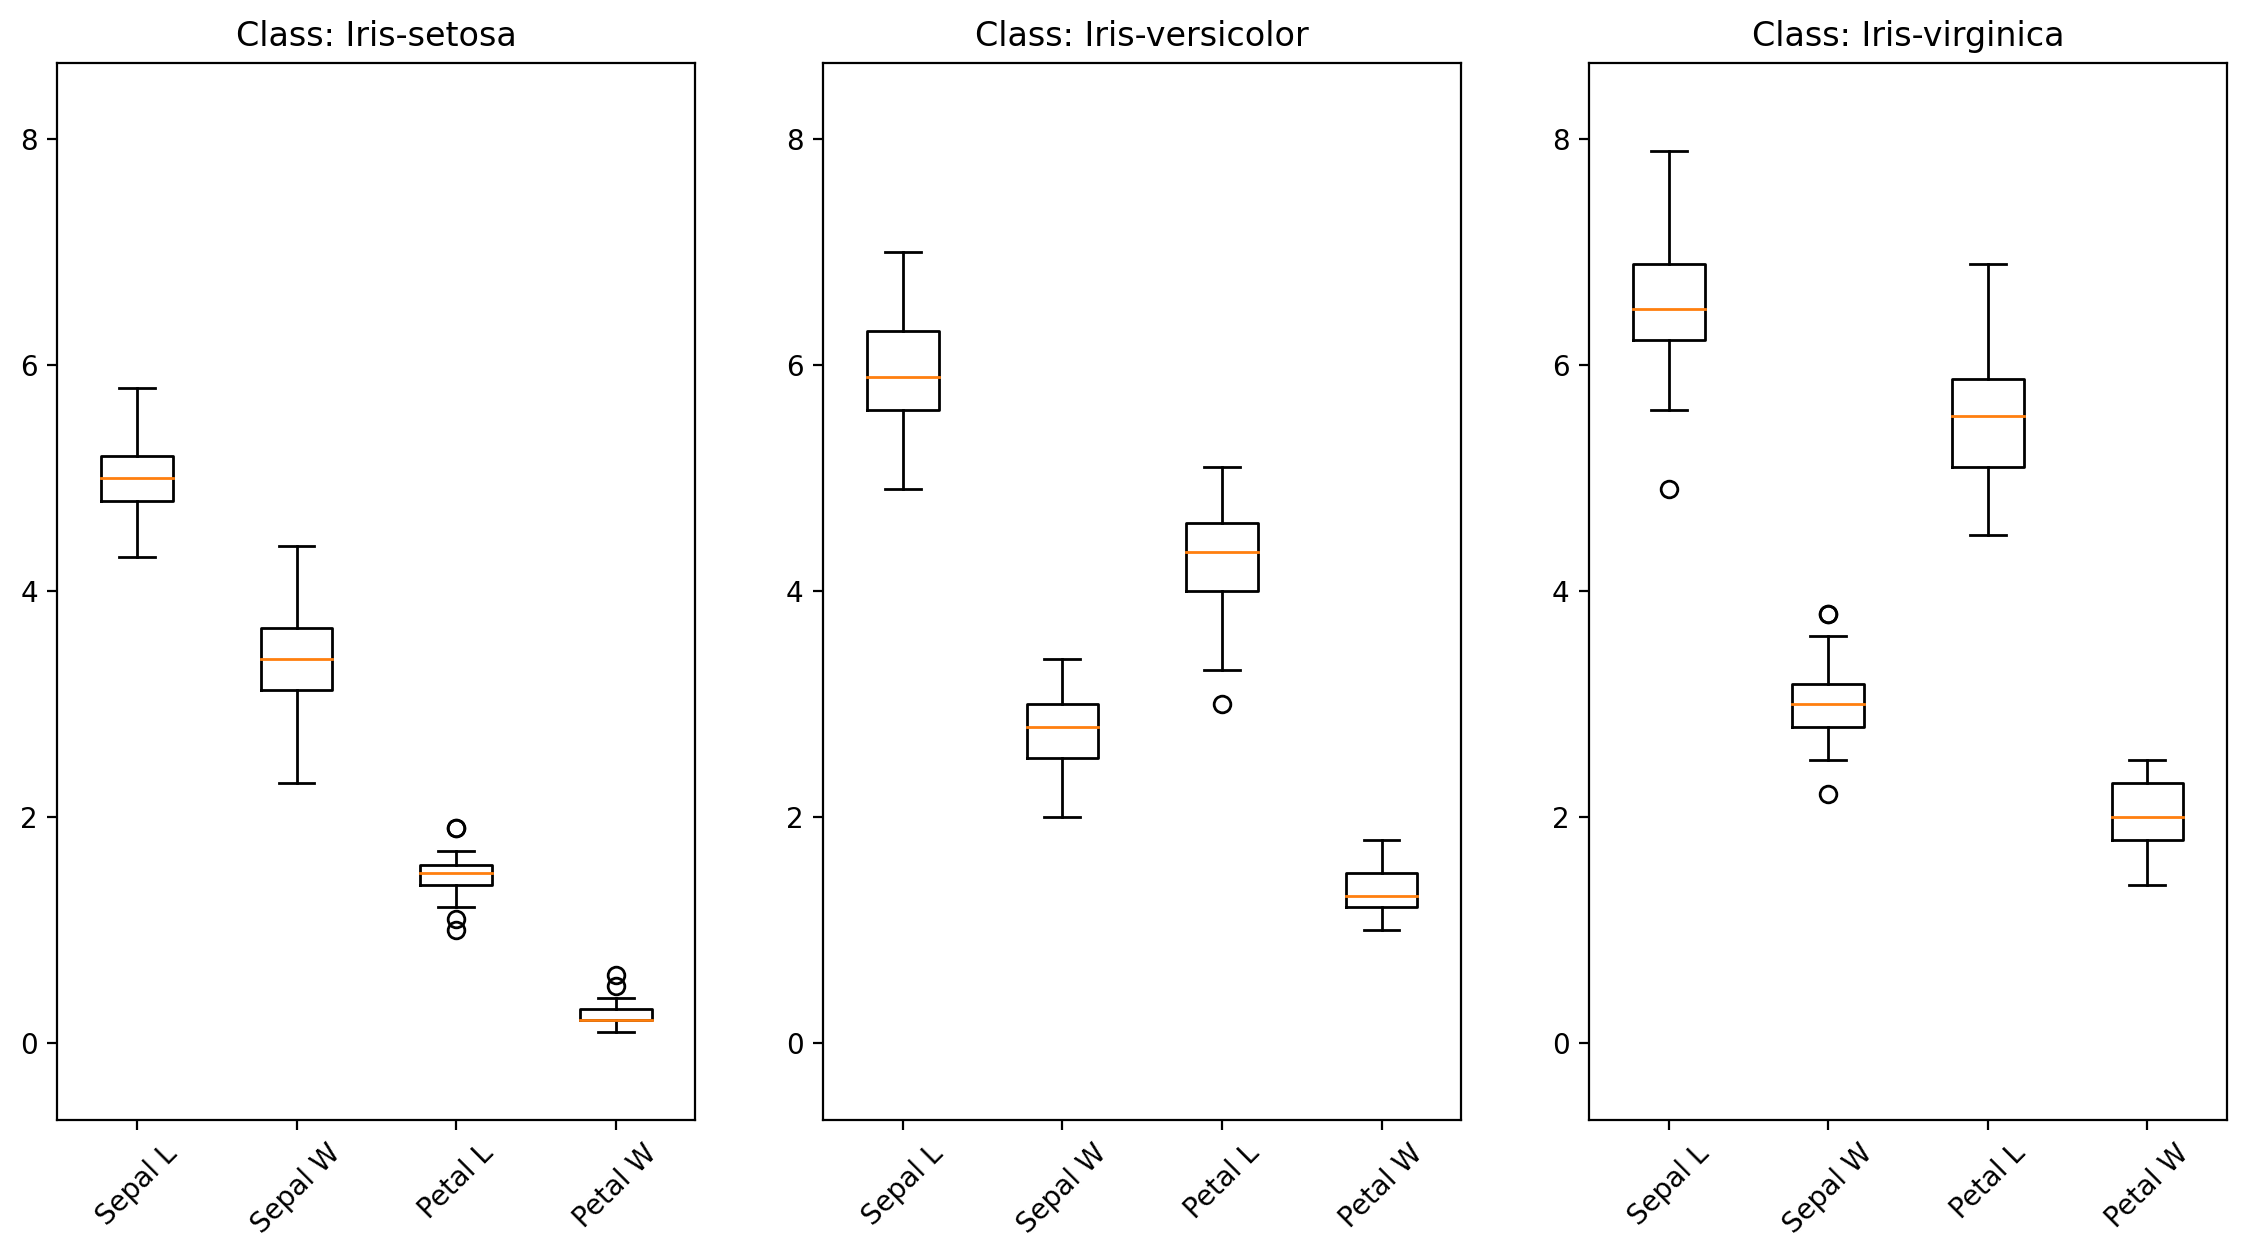

Ran Exercise 4.2.4


In [ ]:
# Exercise 4.2.4
from matplotlib.pyplot import (figure, subplot, boxplot, title, xticks, ylim, 
                               show)
# requires data from exercise 4.1.1

figure(figsize=(14,7))
for c in range(C):
    subplot(1,C,c+1)
    class_mask = (y==c) # binary mask to extract elements of class c
    # or: class_mask = nonzero(y==c)[0].tolist()[0] # indices of class c
    
    boxplot(X[class_mask,:])
    #title('Class: {0}'.format(classNames[c]))
    title('Class: '+classNames[c])
    xticks(range(1,len(attributeNames)+1), [a[:7] for a in attributeNames], rotation=45)
    y_up = X.max()+(X.max()-X.min())*0.1; y_down = X.min()-(X.max()-X.min())*0.1
    ylim(y_down, y_up)

show()

print('Ran Exercise 4.2.4')

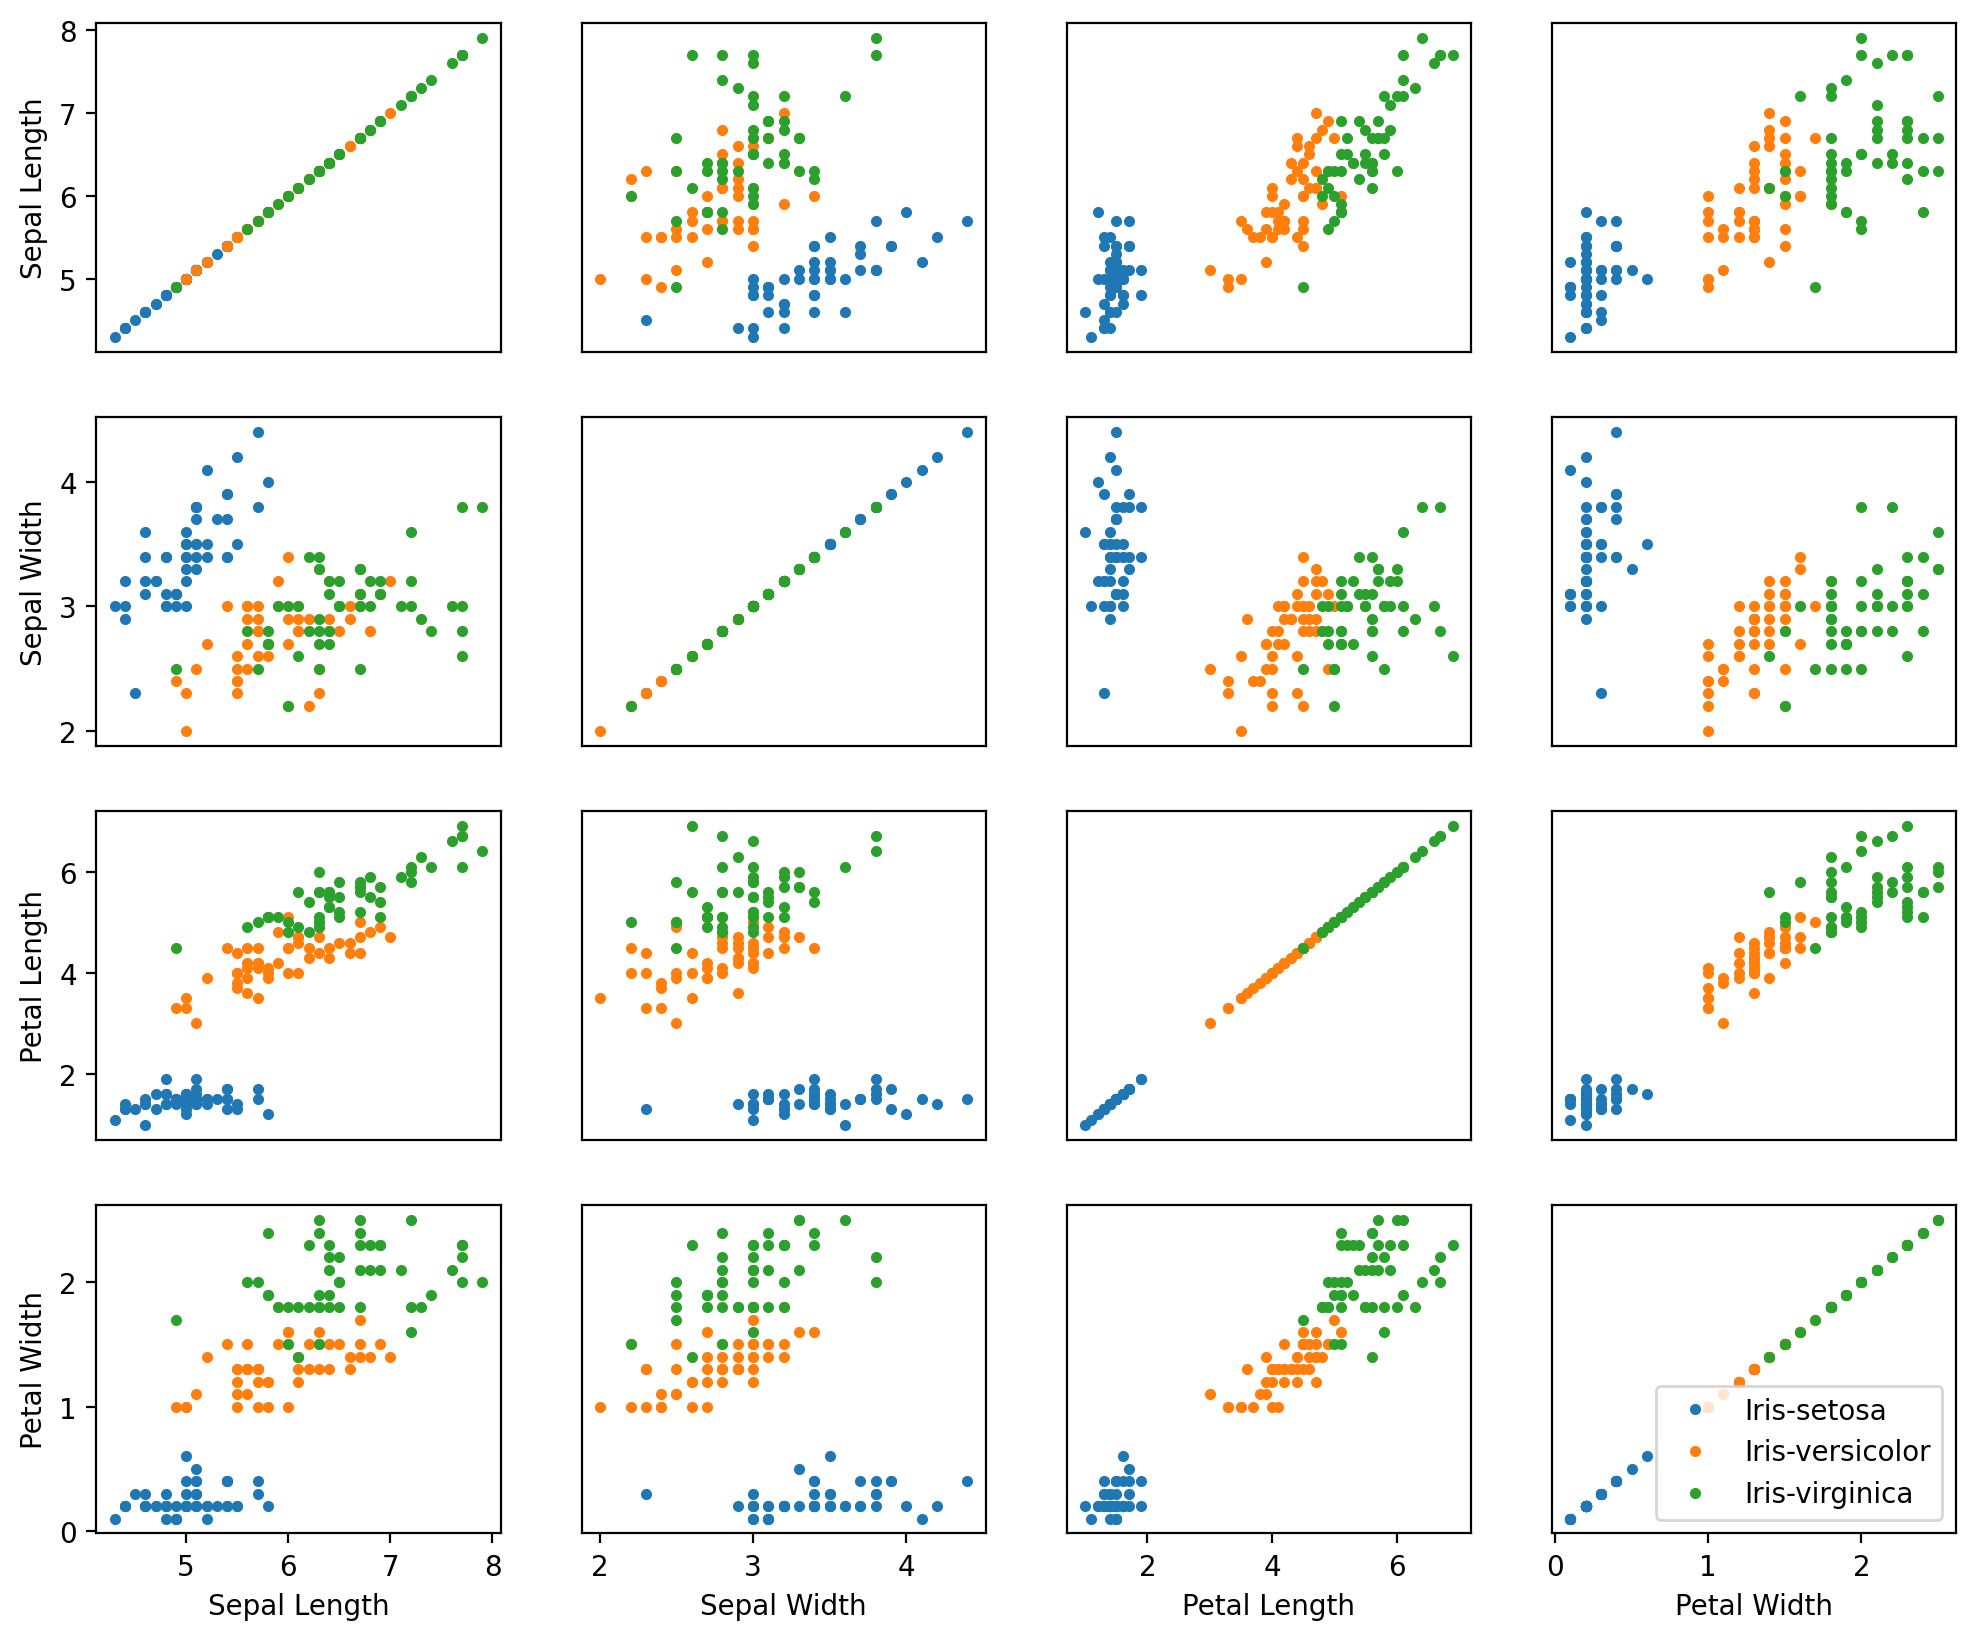

Ran Exercise 4.2.5


In [ ]:
# Exercise 4.2.5

from matplotlib.pyplot import (figure, subplot, plot, xlabel, ylabel, 
                               xticks, yticks,legend,show)

# requires data from exercise 4.2.1

figure(figsize=(12,10))
for m1 in range(M):
    for m2 in range(M):
        subplot(M, M, m1*M + m2 + 1)
        for c in range(C):
            class_mask = (y==c)
            plot(np.array(X[class_mask,m2]), np.array(X[class_mask,m1]), '.')
            if m1==M-1:
                xlabel(attributeNames[m2])
            else:
                xticks([])
            if m2==0:
                ylabel(attributeNames[m1])
            else:
                yticks([])
            #ylim(0,X.max()*1.1)
            #xlim(0,X.max()*1.1)
legend(classNames)

show()

print('Ran Exercise 4.2.5')

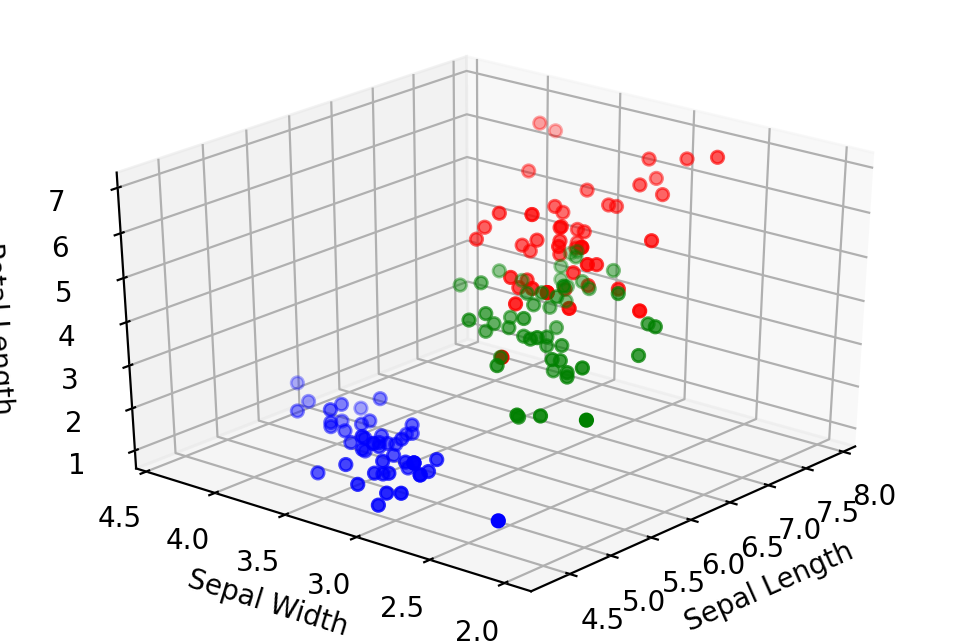

Ran Exercise 4.2.6


In [ ]:
# Exercise 4.2.6

from matplotlib.pyplot import figure, show
from mpl_toolkits.mplot3d import Axes3D

# requires data from exercise 4.1.1

# Indices of the variables to plot
ind = [0, 1, 2]
colors = ['blue', 'green', 'red']

f = figure()
ax = f.add_subplot(111, projection='3d') #Here the mpl_toolkits is used
for c in range(C):
    class_mask = (y==c)
    s = ax.scatter(X[class_mask,ind[0]], X[class_mask,ind[1]], X[class_mask,ind[2]], c=colors[c])

ax.view_init(30, 220)
ax.set_xlabel(attributeNames[ind[0]])
ax.set_ylabel(attributeNames[ind[1]])
ax.set_zlabel(attributeNames[ind[2]])

show()

print('Ran Exercise 4.2.6')

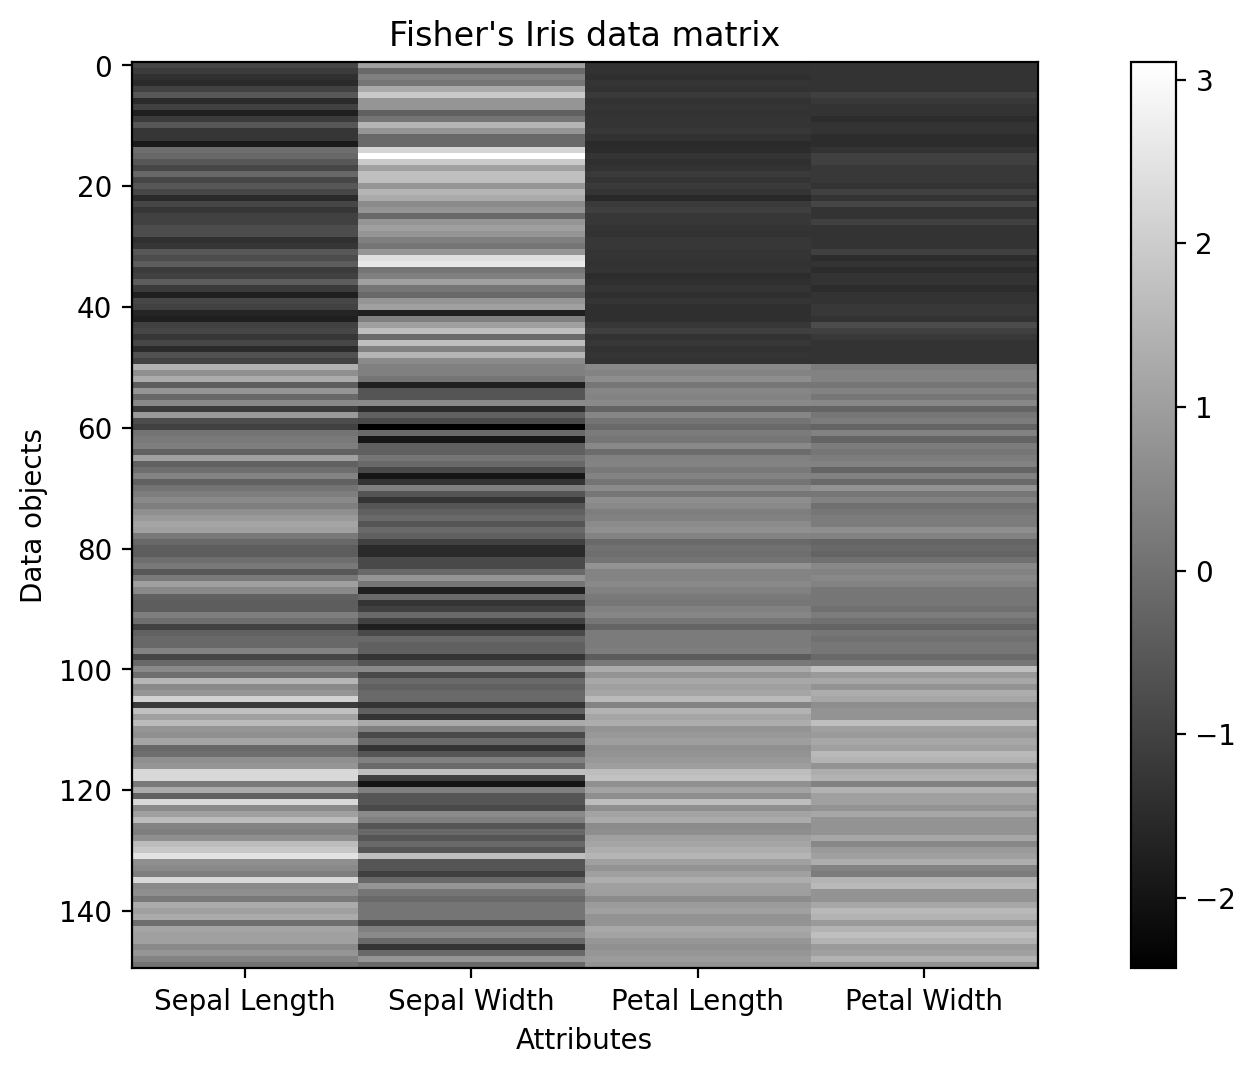

Ran Exercise 4.2.7


In [ ]:
# Exercise 4.2.7

from matplotlib.pyplot import (figure, imshow, xticks, xlabel, ylabel, title, 
                               colorbar, cm, show)
from scipy.stats import zscore

# requires data from exercise 4.2.1

X_standarized = zscore(X, ddof=1)

figure(figsize=(12,6))
imshow(X_standarized, interpolation='none', aspect=(4./N), cmap=cm.gray);
xticks(range(4), attributeNames)
xlabel('Attributes')
ylabel('Data objects')
title('Fisher\'s Iris data matrix')
colorbar()

show()

print('Ran Exercise 4.2.7')

## Exercise 4.3

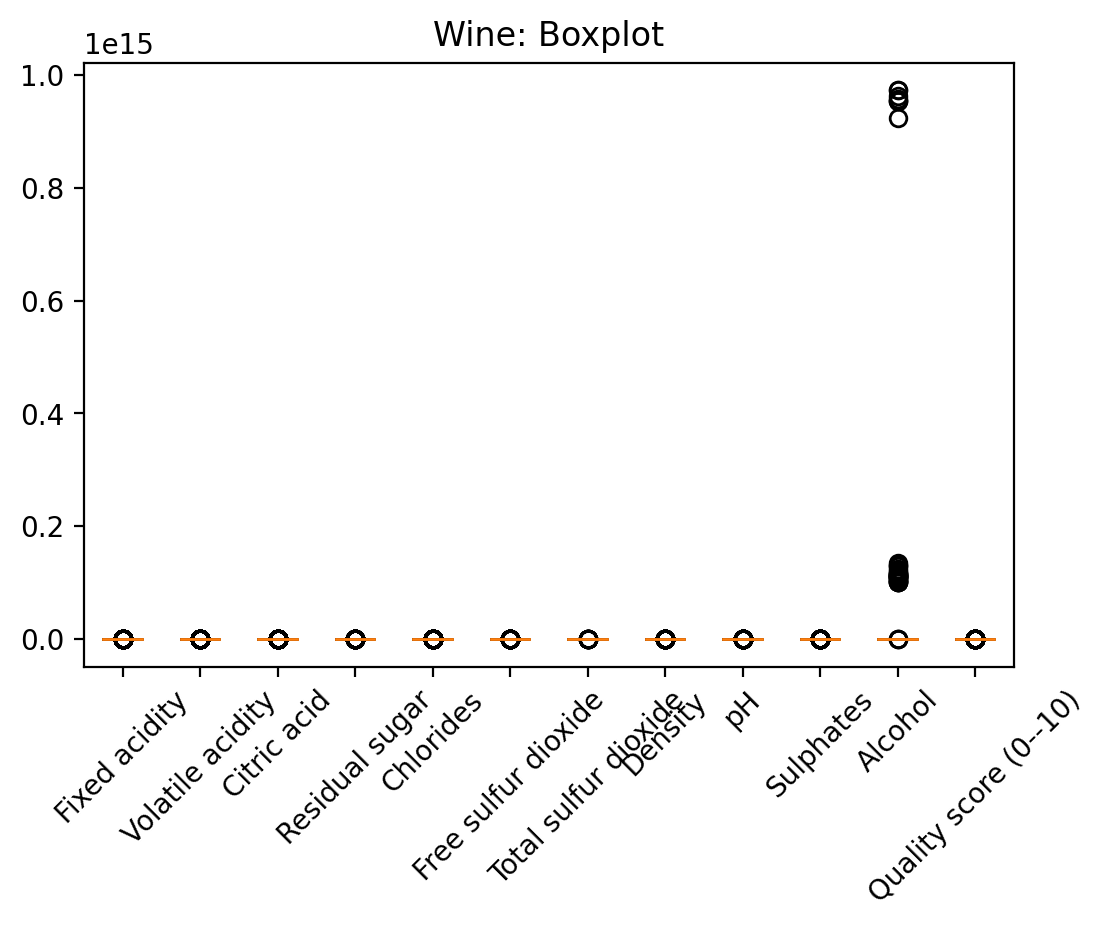

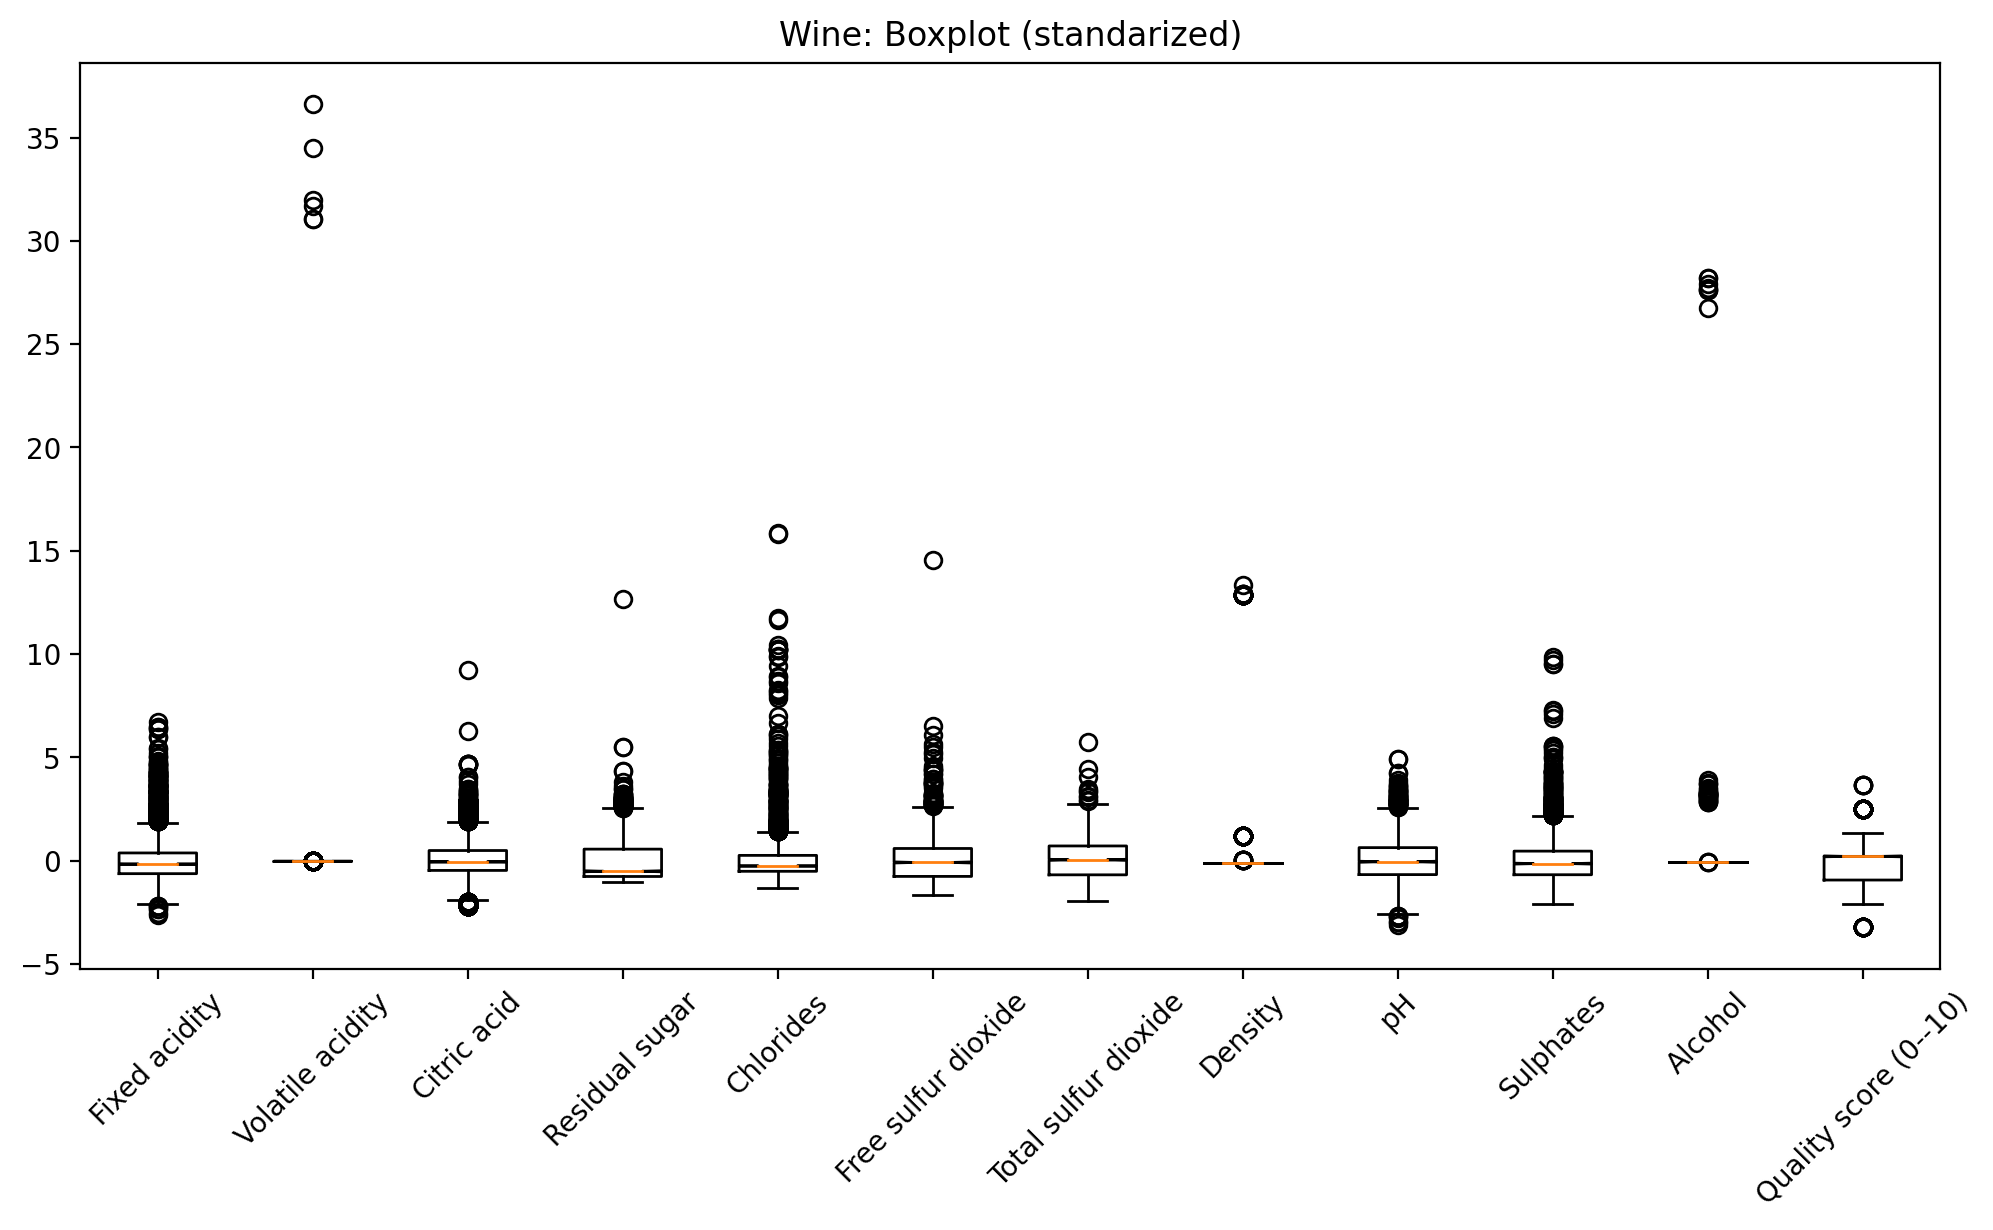

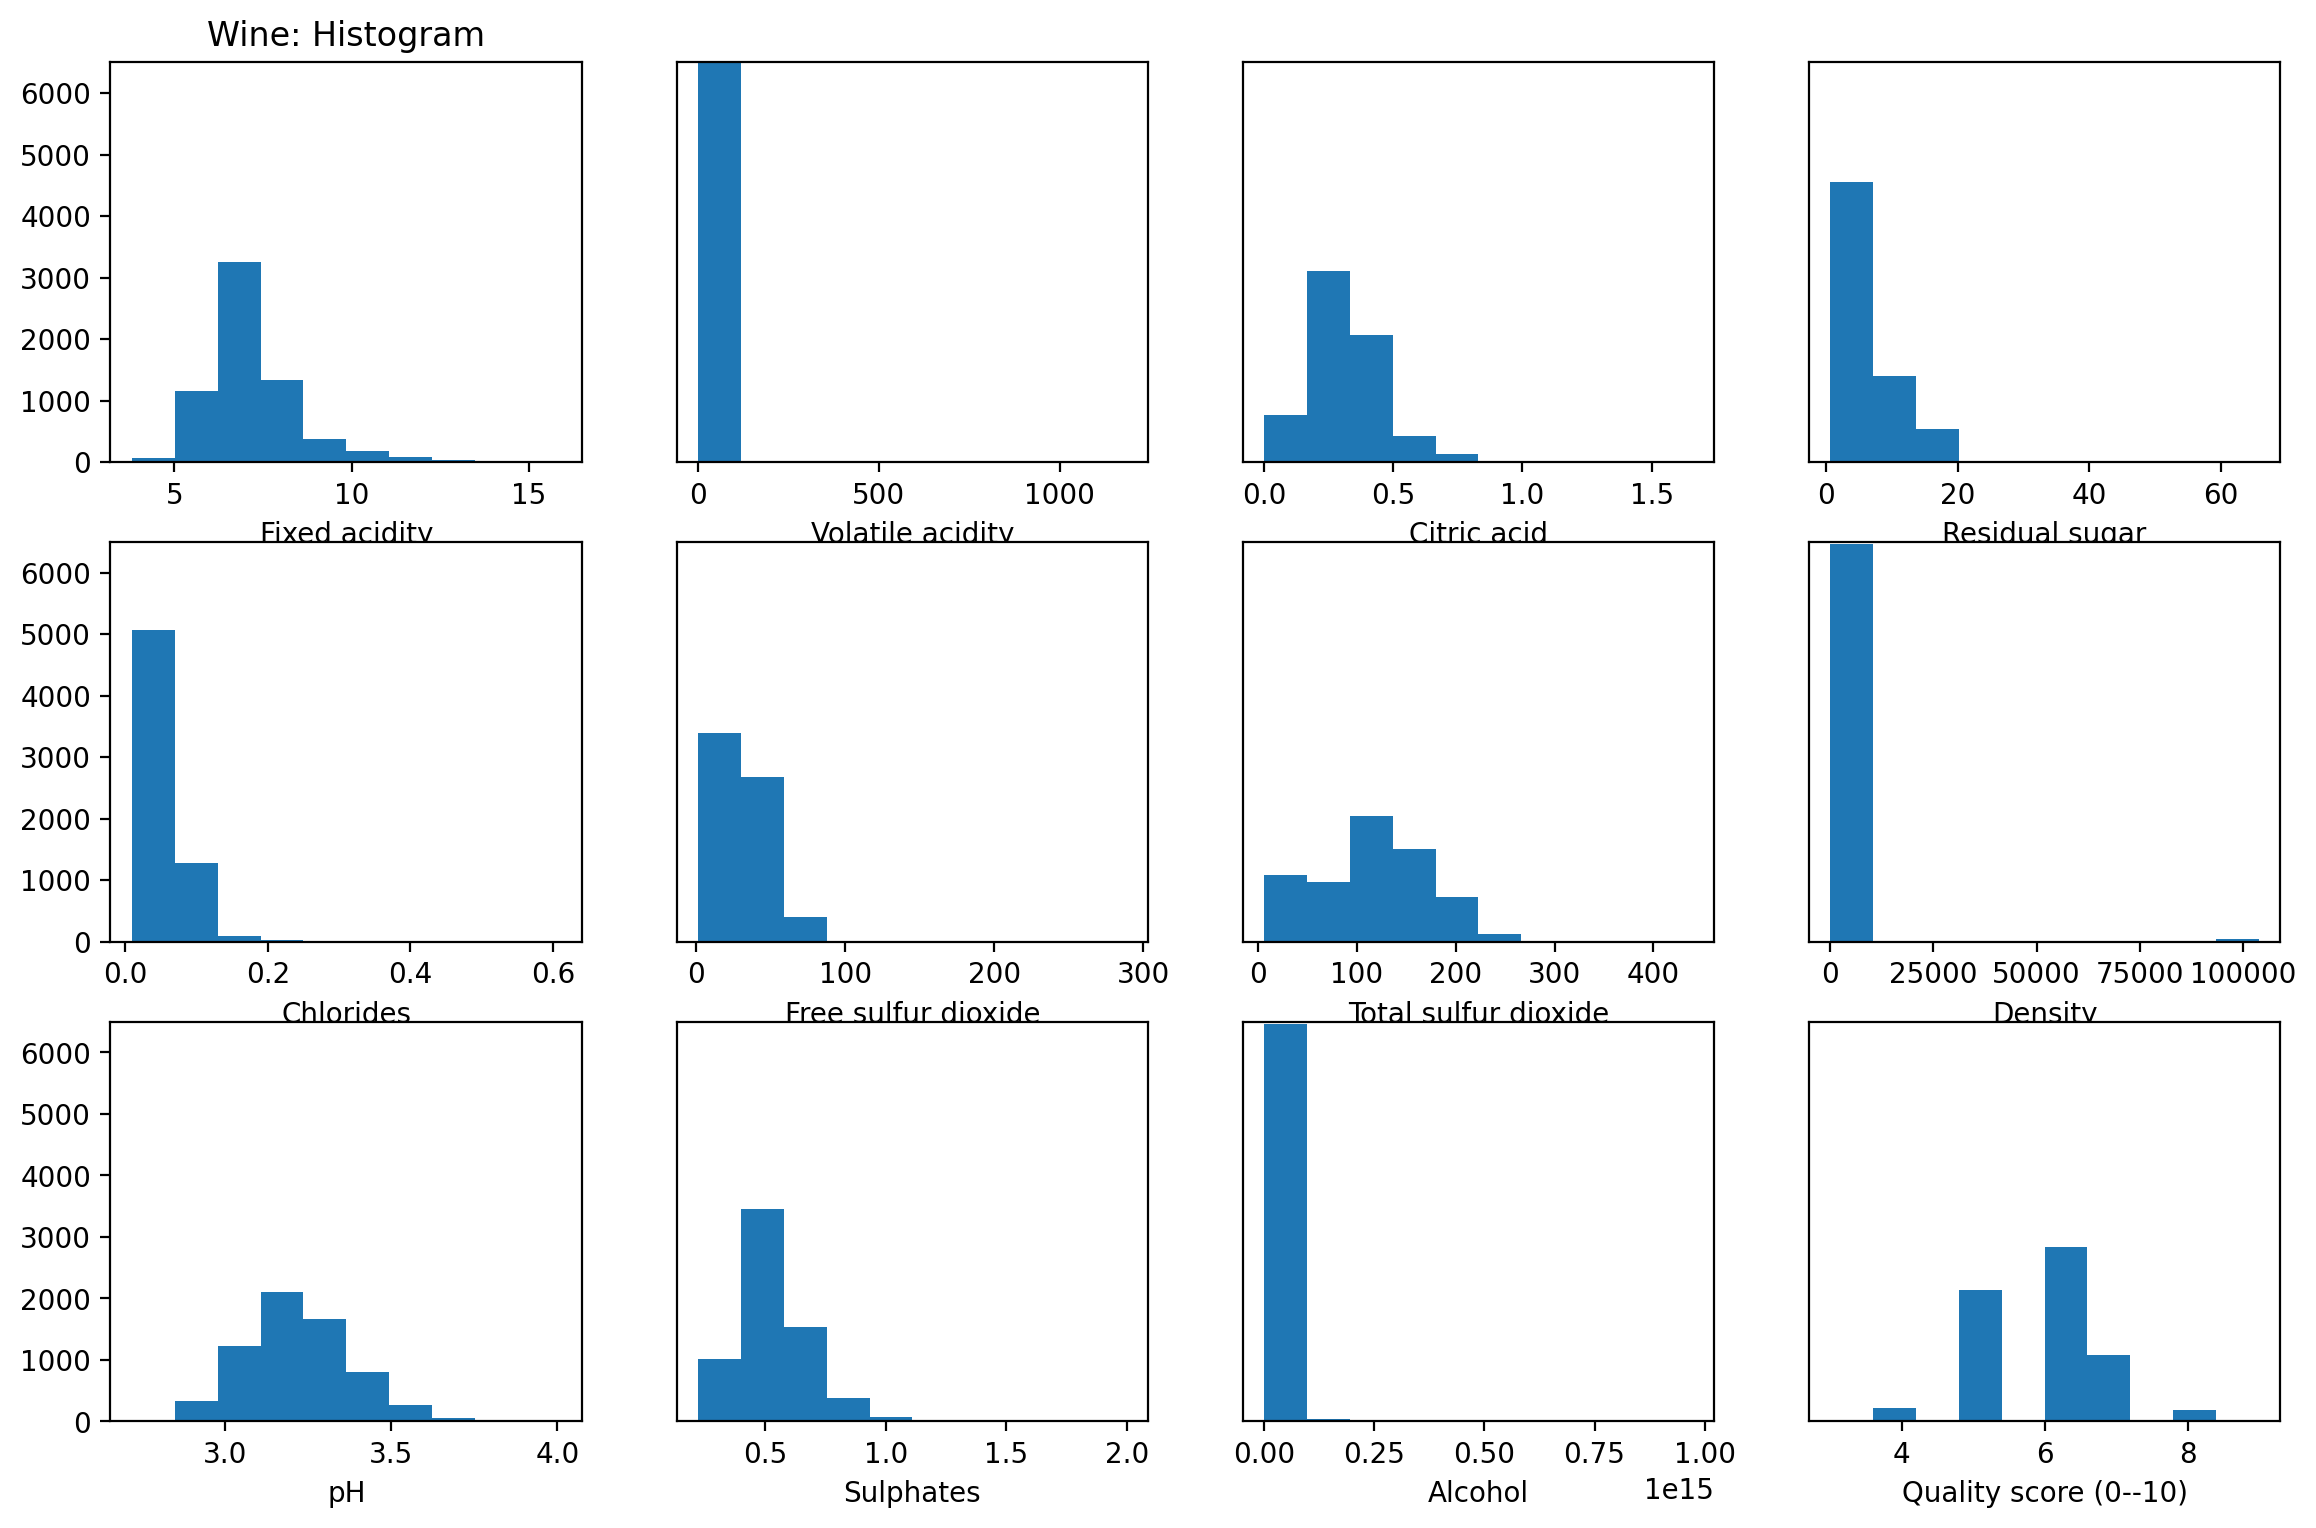

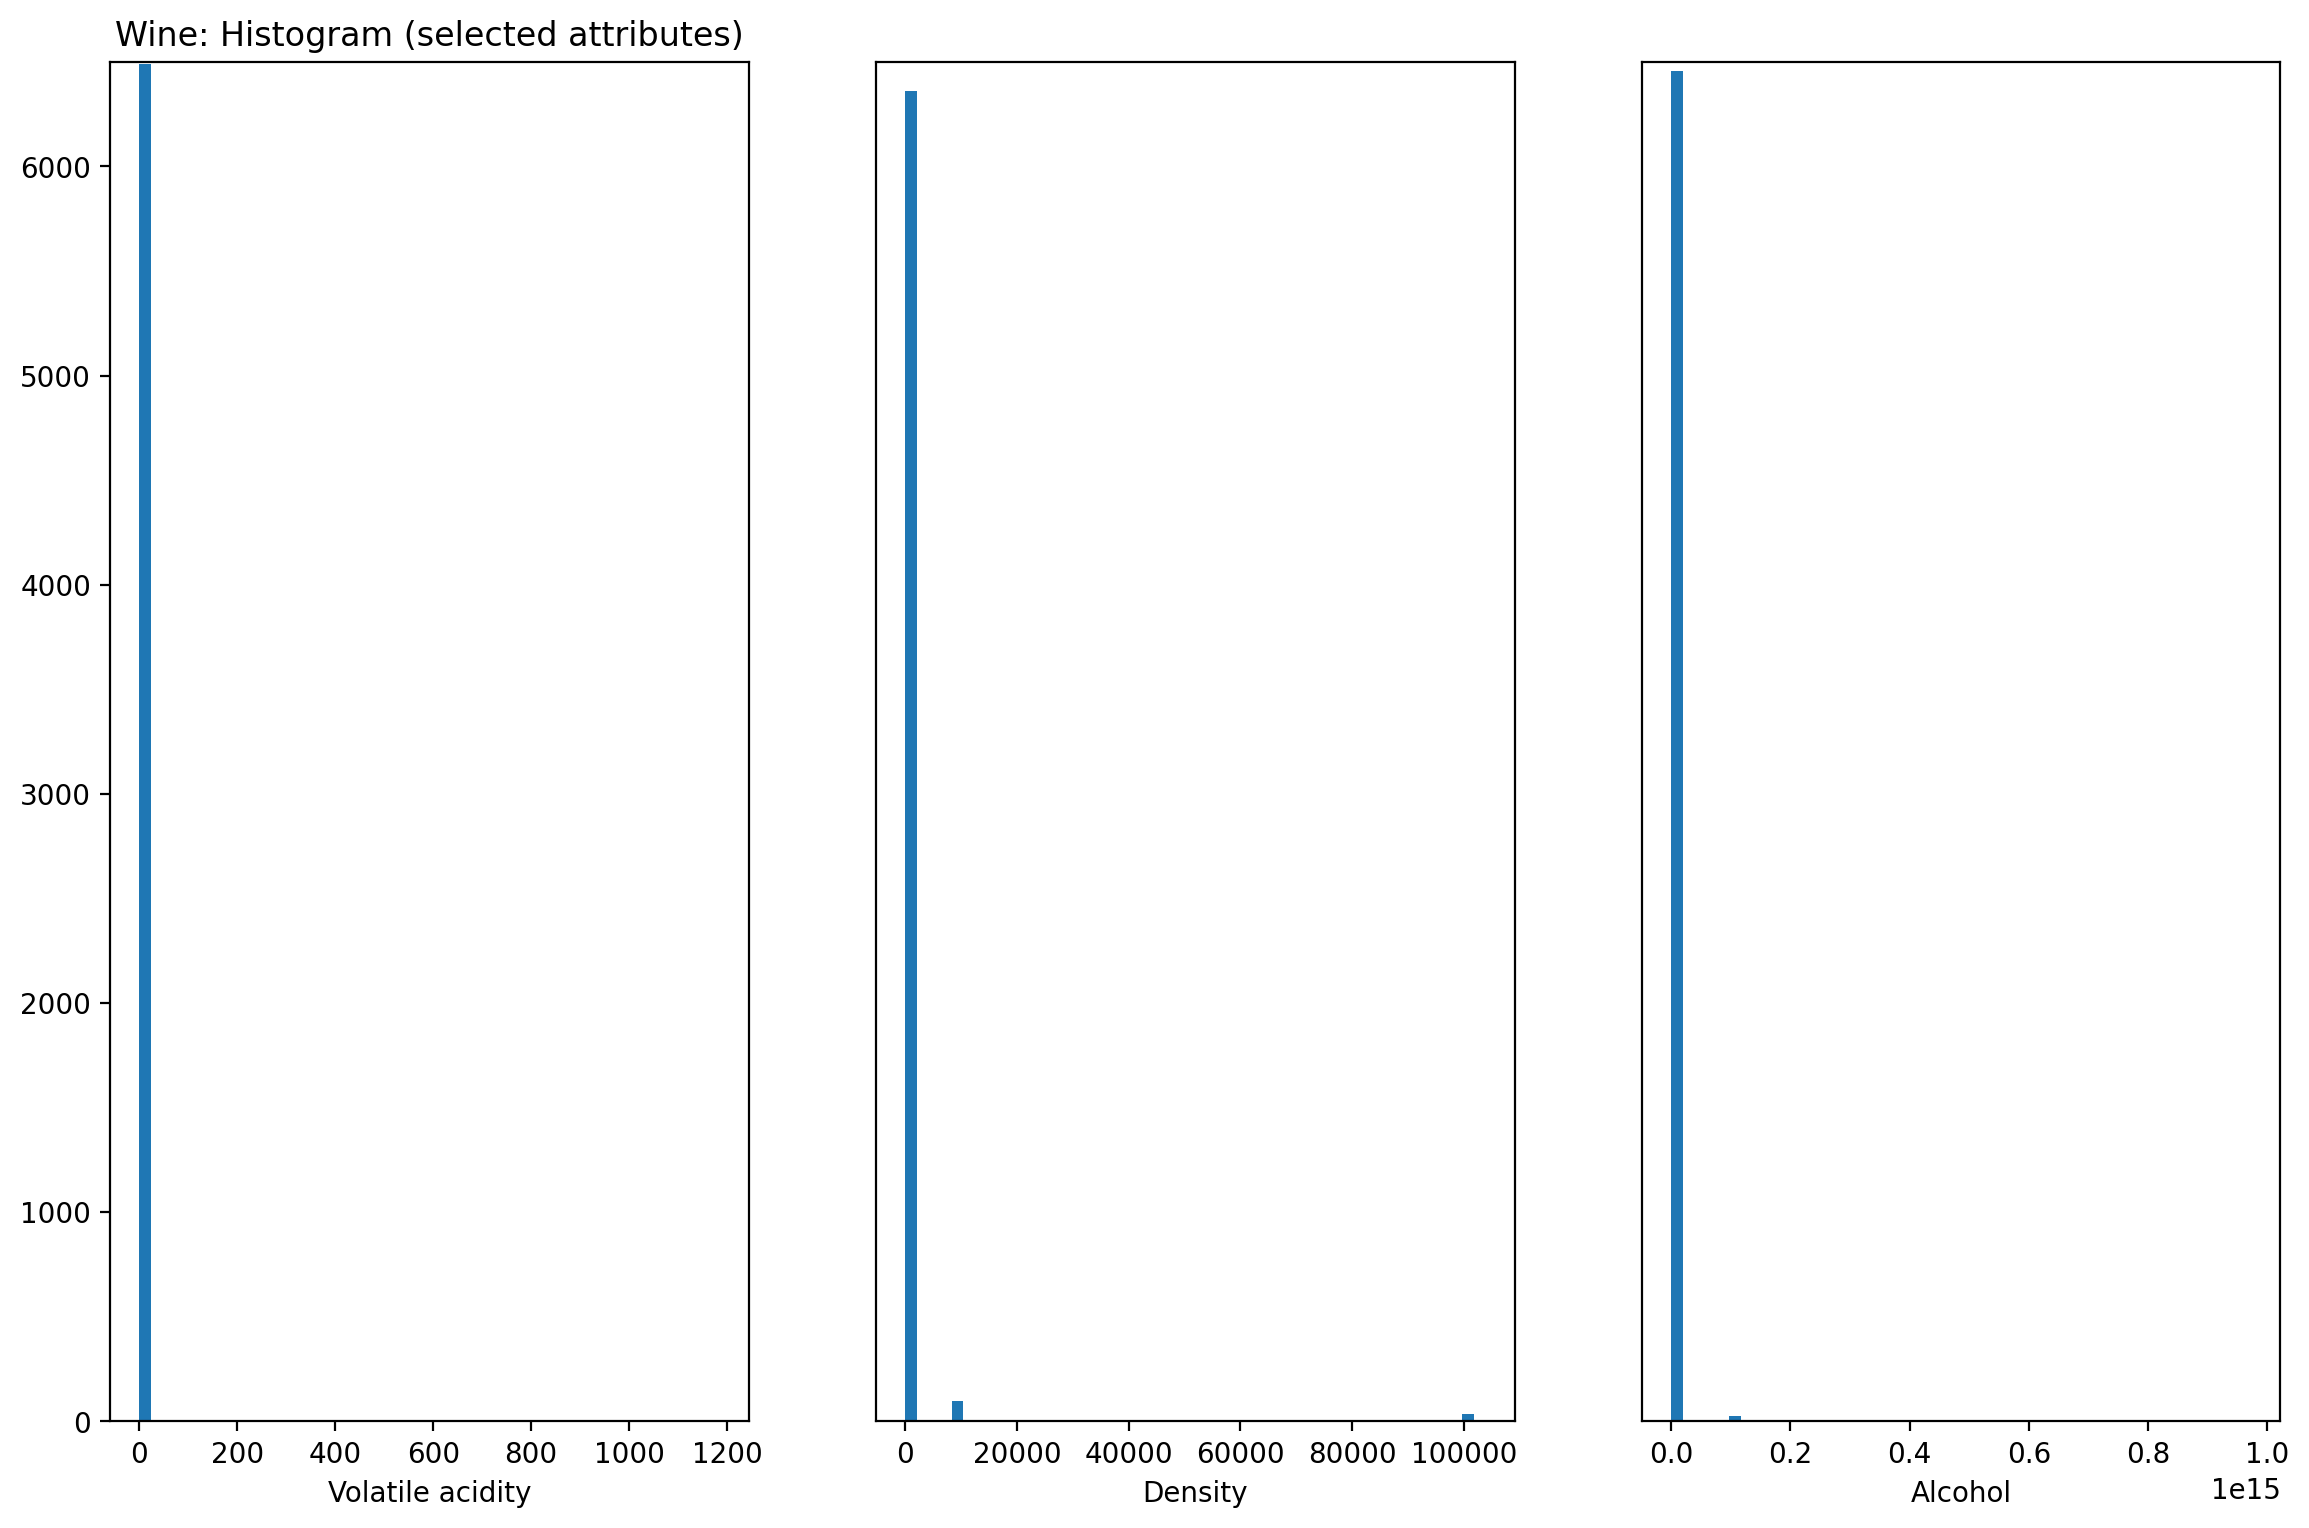

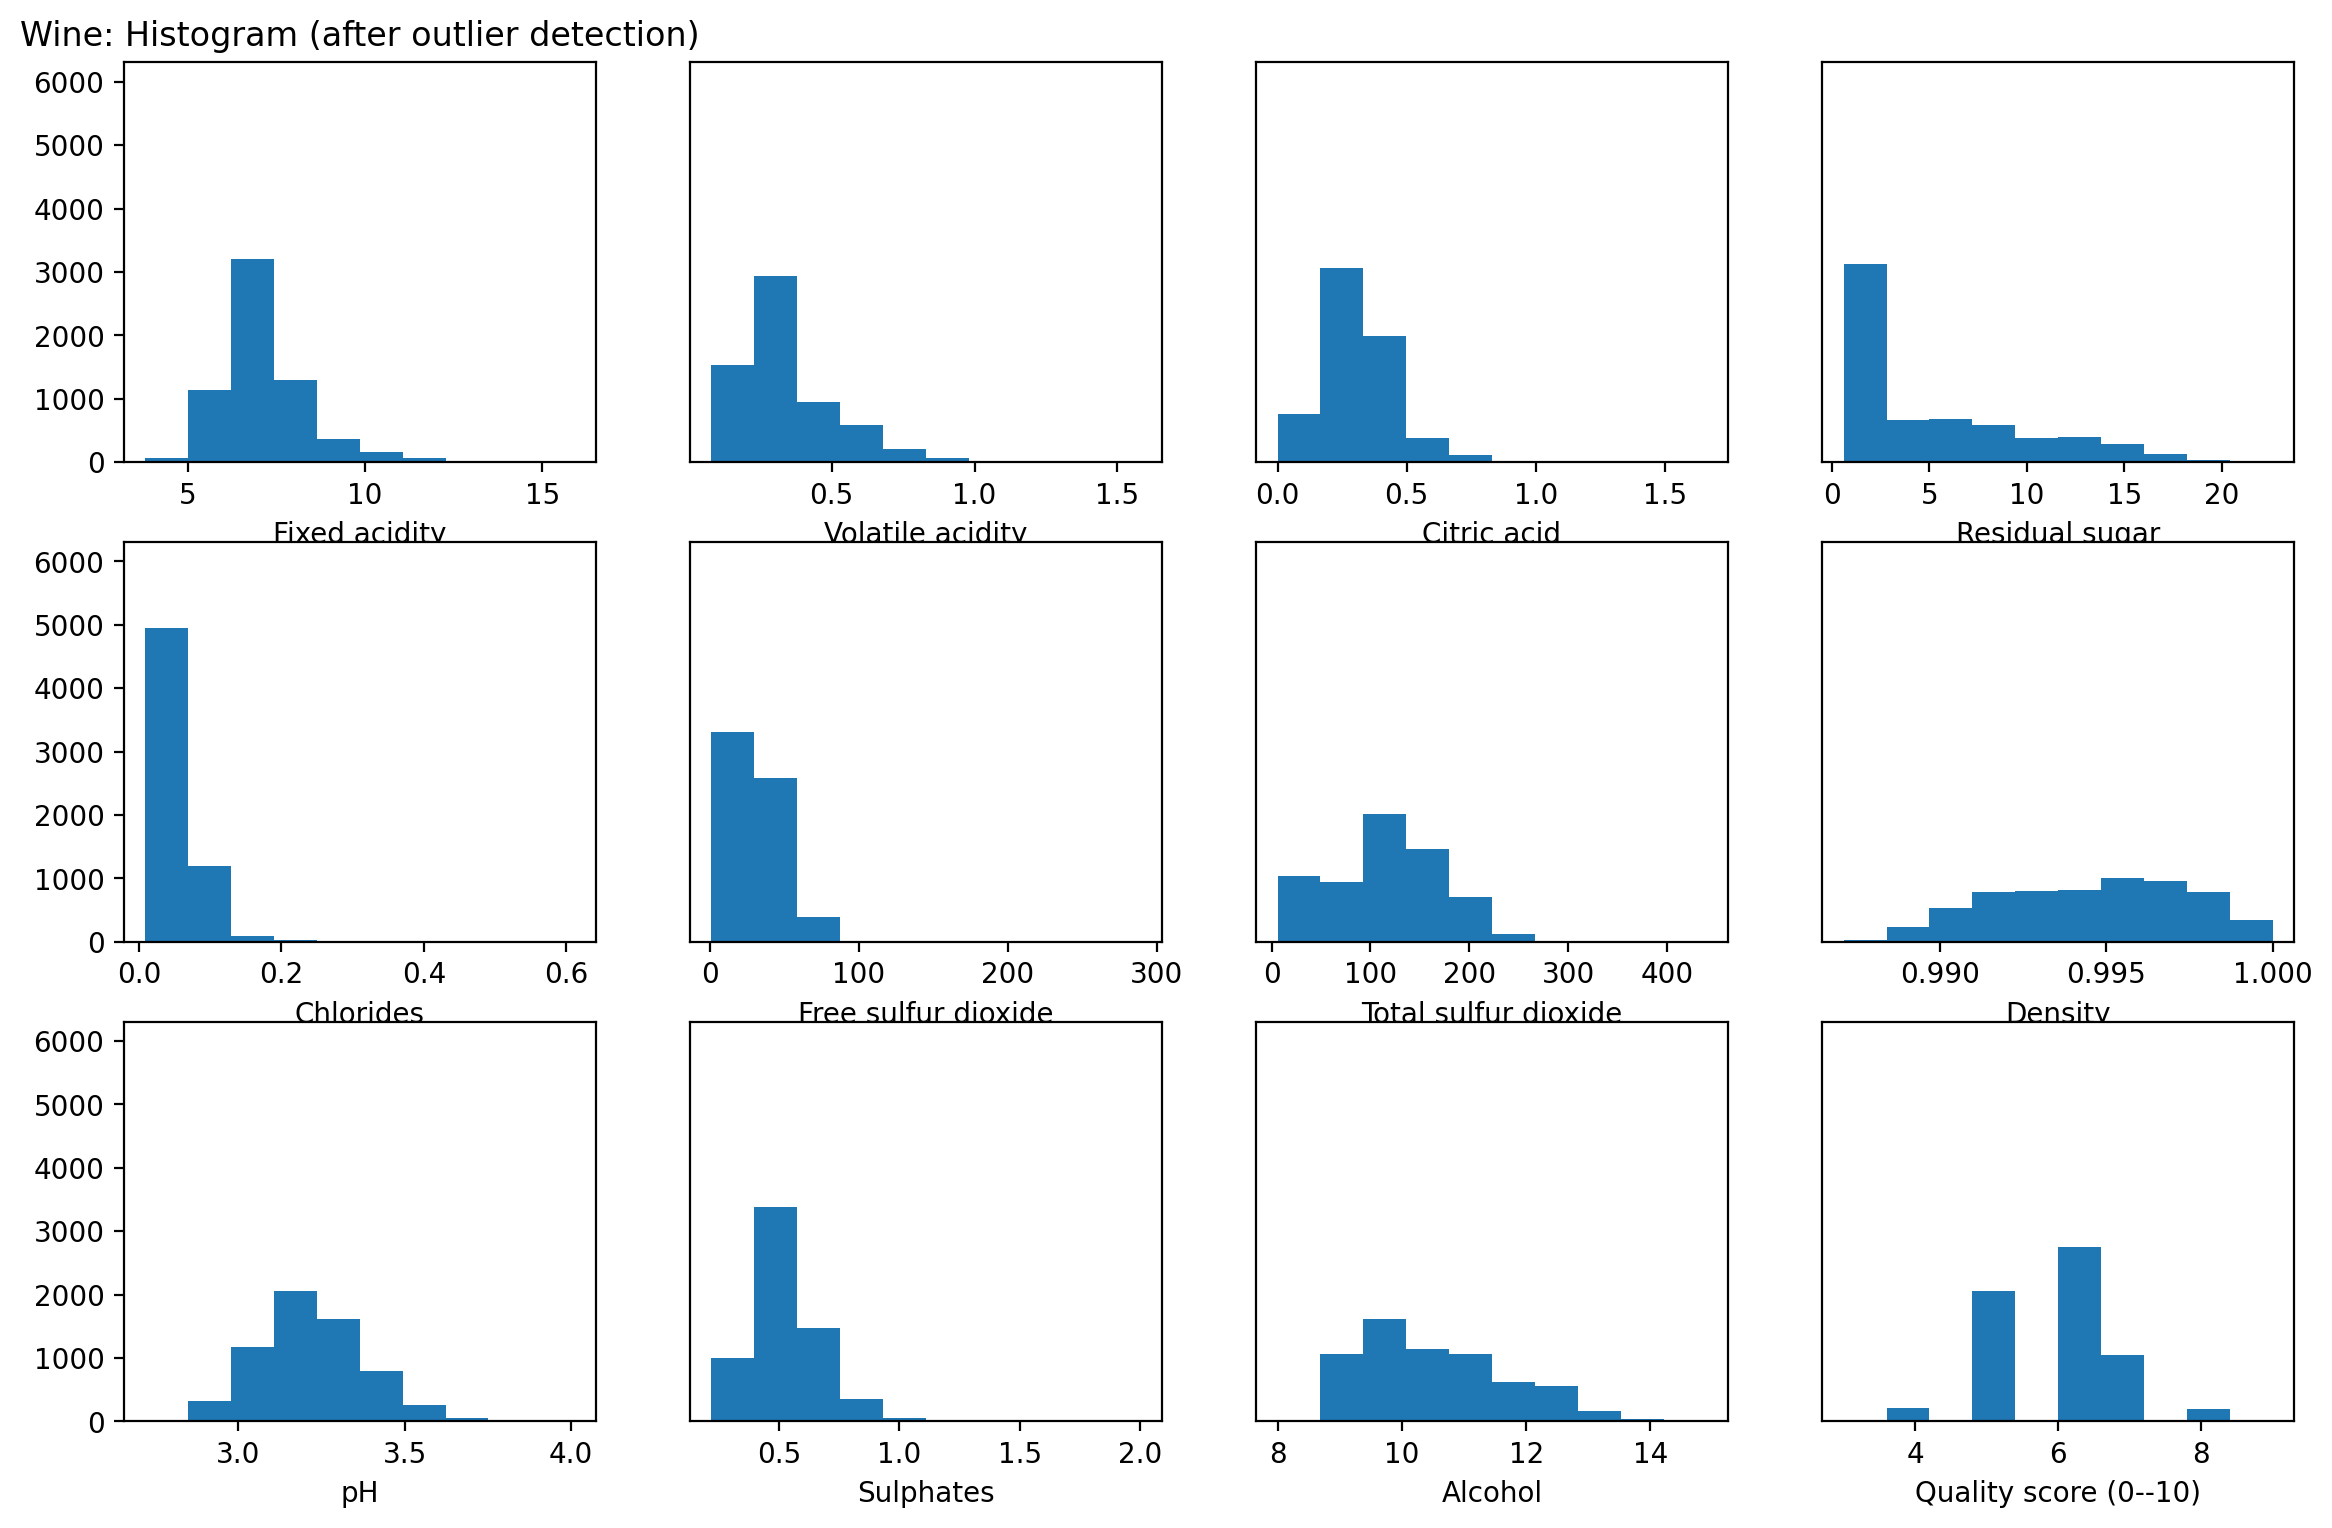

Ran Exercise 4.3.1


In [ ]:
# exercise 4.3.1

from matplotlib.pyplot import (figure, title, boxplot, xticks, subplot, hist,
                               xlabel, ylim, yticks, show)
import numpy as np
from scipy.io import loadmat
from scipy.stats import zscore

# Load Matlab data file and extract variables of interest
mat_data = loadmat('/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/wine.mat')
X = mat_data['X']
y = mat_data['y'].squeeze()
C = mat_data['C'][0,0]
M = mat_data['M'][0,0]
N = mat_data['N'][0,0]
attributeNames = [name[0][0] for name in mat_data['attributeNames']]
classNames = [cls[0][0] for cls in mat_data['classNames']]

# We start with a box plot of each attribute
figure()
title('Wine: Boxplot')
boxplot(X)
xticks(range(1,M+1), attributeNames, rotation=45)

# From this it is clear that there are some outliers in the Alcohol
# attribute (10x10^14 is clearly not a proper value for alcohol content)
# However, it is impossible to see the distribution of the data, because
# the axis is dominated by these extreme outliers. To avoid this, we plot a
# box plot of standardized data (using the zscore function).
figure(figsize=(12,6))
title('Wine: Boxplot (standarized)')
boxplot(zscore(X, ddof=1), attributeNames)
xticks(range(1,M+1), attributeNames, rotation=45)

# This plot reveals that there are clearly some outliers in the Volatile
# acidity, Density, and Alcohol attributes, i.e. attribute number 2, 8,
# and 11. 

# Next, we plot histograms of all attributes.
figure(figsize=(14,9))
u = np.floor(np.sqrt(M)); v = np.ceil(float(M)/u)
for i in range(M):
    subplot(u,v,i+1)
    hist(X[:,i])
    xlabel(attributeNames[i])
    ylim(0, N) # Make the y-axes equal for improved readability
    if i%v!=0: yticks([])
    if i==0: title('Wine: Histogram')
    

# This confirms our belief about outliers in attributes 2, 8, and 11.
# To take a closer look at this, we next plot histograms of the 
# attributes we suspect contains outliers
figure(figsize=(14,9))
m = [1, 7, 10]
for i in range(len(m)):
    subplot(1,len(m),i+1)
    hist(X[:,m[i]],50)
    xlabel(attributeNames[m[i]])
    ylim(0, N) # Make the y-axes equal for improved readability
    if i>0: yticks([])
    if i==0: title('Wine: Histogram (selected attributes)')


# The histograms show that there are a few very extreme values in these
# three attributes. To identify these values as outliers, we must use our
# knowledge about the data set and the attributes. Say we expect volatide
# acidity to be around 0-2 g/dm^3, density to be close to 1 g/cm^3, and
# alcohol percentage to be somewhere between 5-20 % vol. Then we can safely
# identify the following outliers, which are a factor of 10 greater than
# the largest we expect.
outlier_mask = (X[:,1]>20) | (X[:,7]>10) | (X[:,10]>200)
valid_mask = np.logical_not(outlier_mask)

# Finally we will remove these from the data set
X = X[valid_mask,:]
y = y[valid_mask]
N = len(y)


# Now, we can repeat the process to see if there are any more outliers
# present in the data. We take a look at a histogram of all attributes:
figure(figsize=(14,9))
u = np.floor(np.sqrt(M)); v = np.ceil(float(M)/u)
for i in range(M):
    subplot(u,v,i+1)
    hist(X[:,i])
    xlabel(attributeNames[i])
    ylim(0, N) # Make the y-axes equal for improved readability
    if i%v!=0: yticks([])
    if i==0: title('Wine: Histogram (after outlier detection)')

# This reveals no further outliers, and we conclude that all outliers have
# been detected and removed.

show()

print('Ran Exercise 4.3.1')

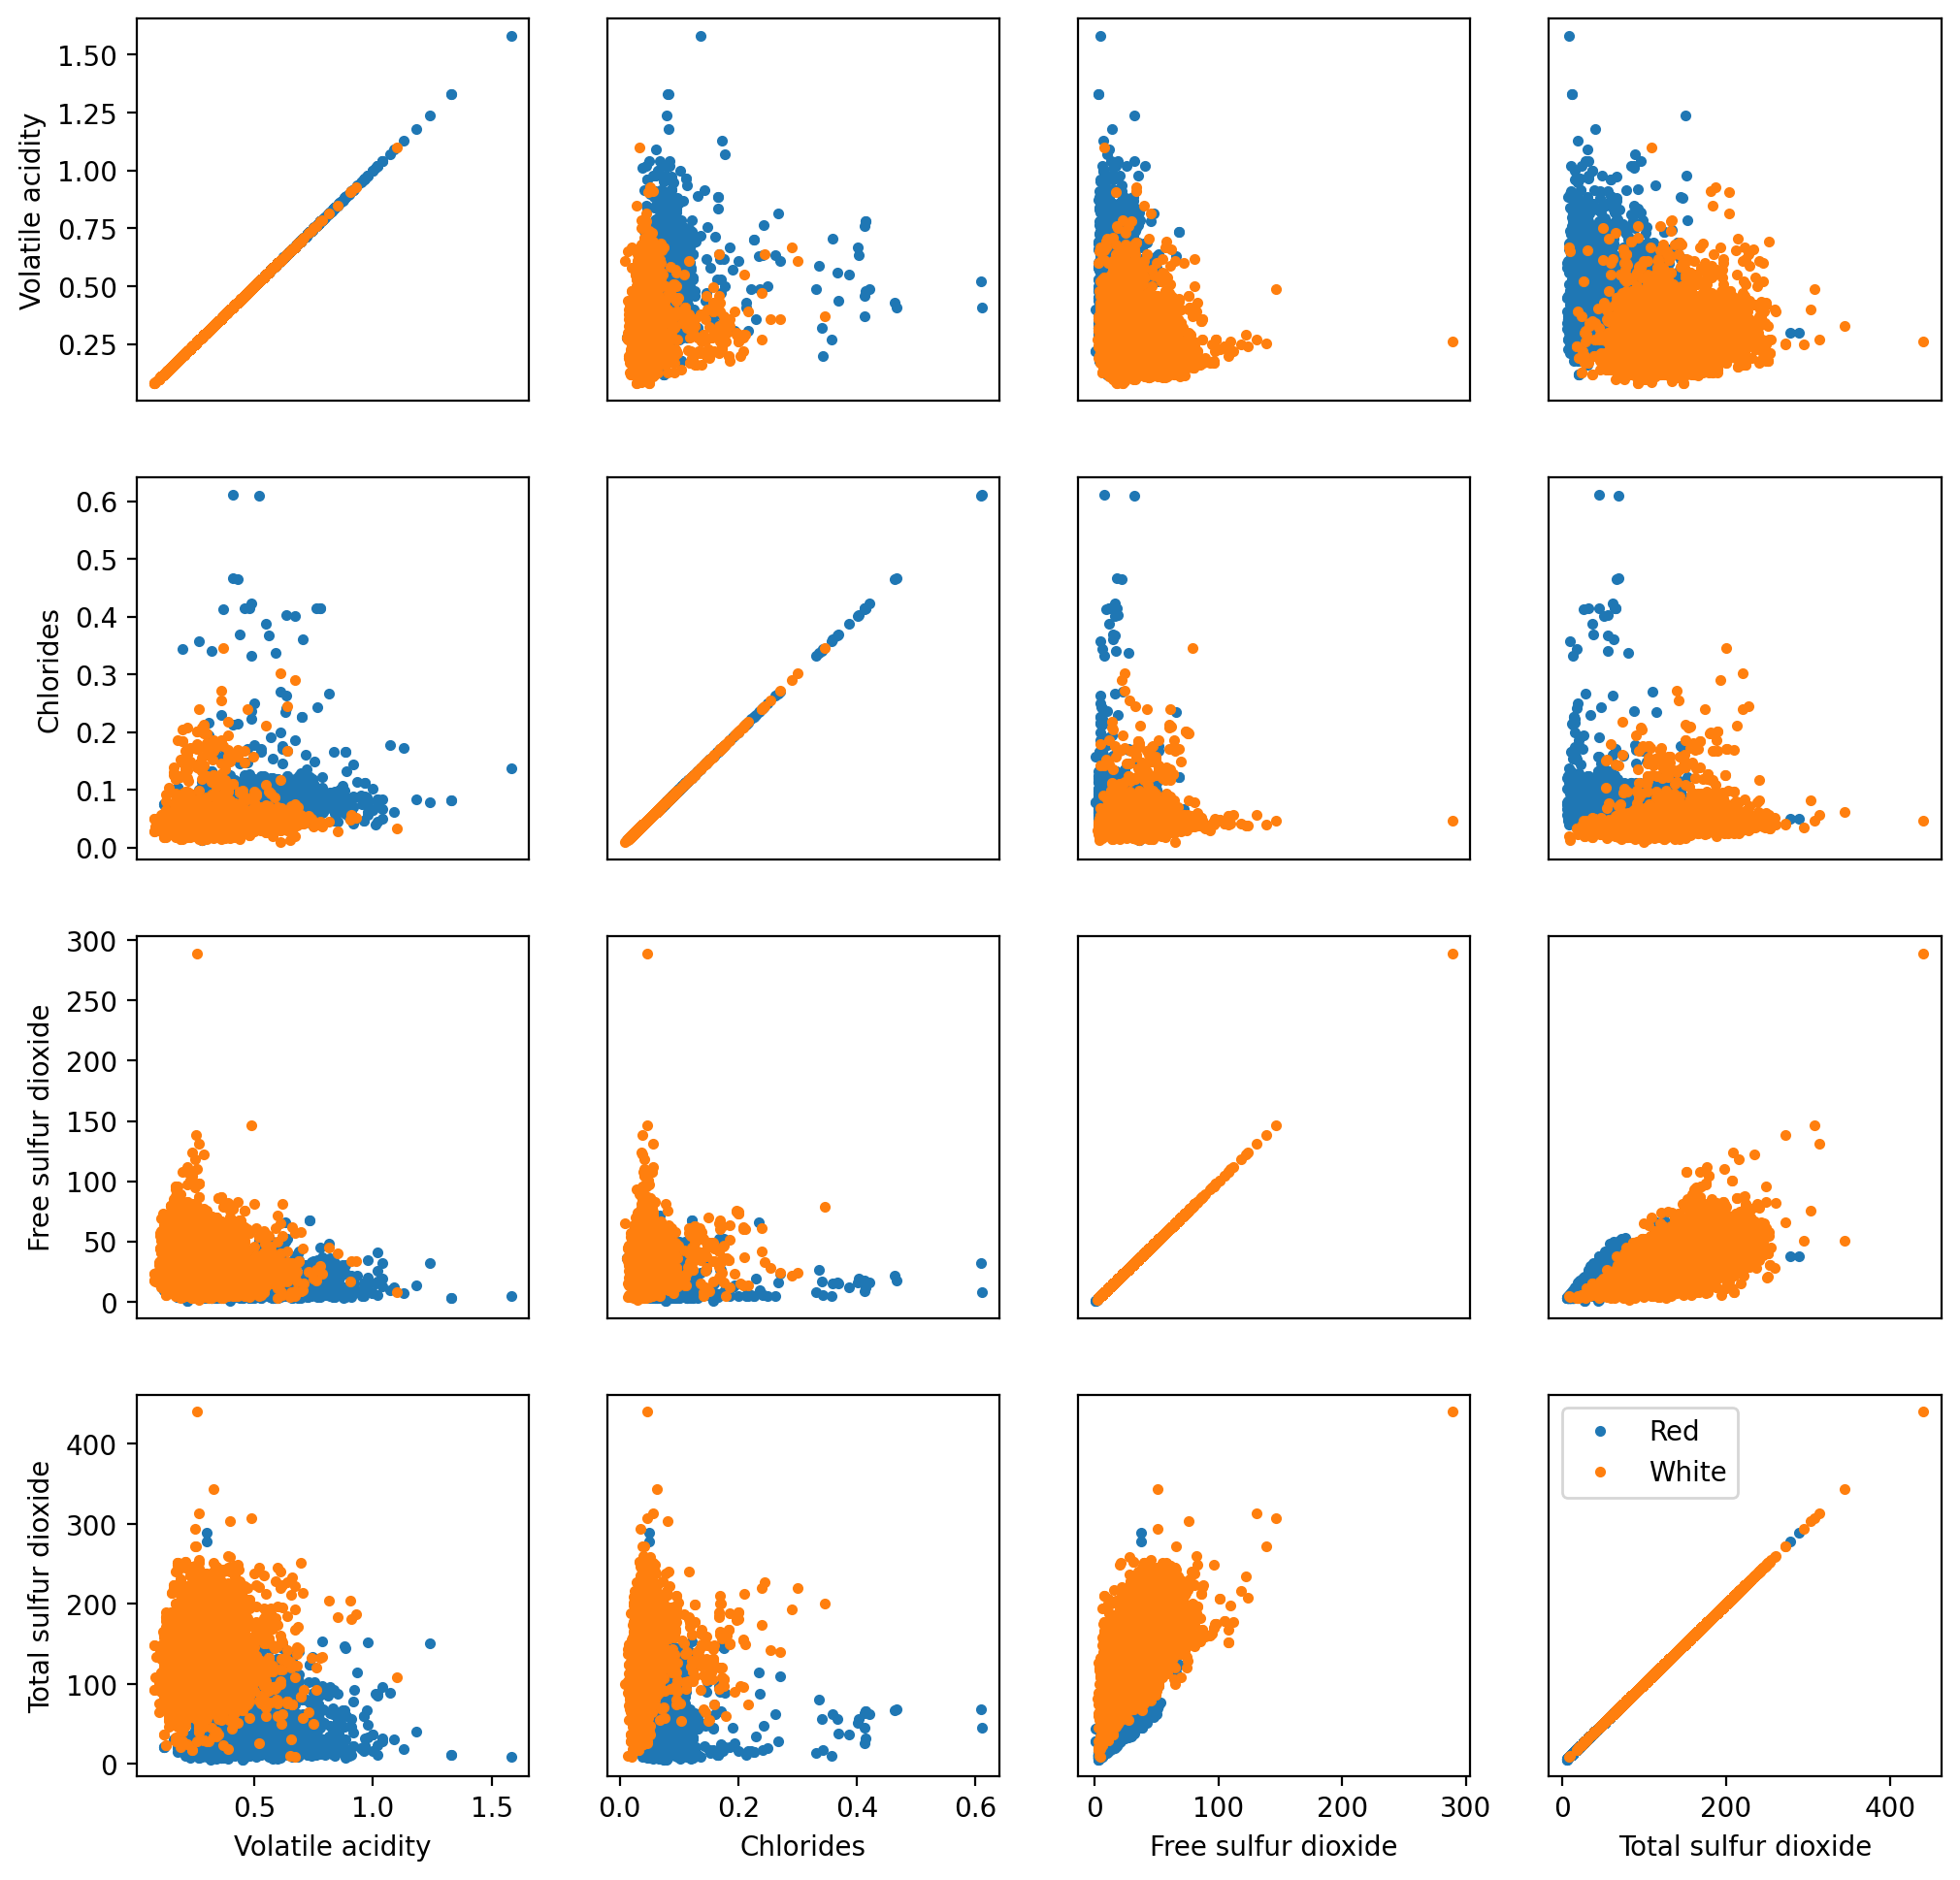

Ran Exercise 4.3.2


In [ ]:
# exercise 4.3.2

from matplotlib.pyplot import figure, subplot, plot, legend, show,  xlabel, ylabel, xticks, yticks
import numpy as np
from scipy.io import loadmat
from scipy.stats import zscore

# Load Matlab data file and extract variables of interest
mat_data = loadmat('/content/drive/Othercomputers/我的 MacBook Pro/Desktop/02450/02450Toolbox_Python/Data/wine.mat')
X = mat_data['X']
y = np.squeeze(mat_data['y'])
C = mat_data['C'][0,0]
M = mat_data['M'][0,0]
N = mat_data['N'][0,0]

attributeNames = [name[0][0] for name in mat_data['attributeNames']]
classNames = [cls[0] for cls in mat_data['classNames'][0]]
    
# The histograms show that there are a few very extreme values in these
# three attributes. To identify these values as outliers, we must use our
# knowledge about the data set and the attributes. Say we expect volatide
# acidity to be around 0-2 g/dm^3, density to be close to 1 g/cm^3, and
# alcohol percentage to be somewhere between 5-20 % vol. Then we can safely
# identify the following outliers, which are a factor of 10 greater than
# the largest we expect.
outlier_mask = (X[:,1]>20) | (X[:,7]>10) | (X[:,10]>200)
valid_mask = np.logical_not(outlier_mask)

# Finally we will remove these from the data set
X = X[valid_mask,:]
y = y[valid_mask]
N = len(y)
Xnorm = zscore(X, ddof=1)

## Next we plot a number of atttributes
Attributes = [1,4,5,6]
NumAtr = len(Attributes)

figure(figsize=(12,12))
for m1 in range(NumAtr):
    for m2 in range(NumAtr):
        subplot(NumAtr, NumAtr, m1*NumAtr + m2 + 1)
        for c in range(C):
            class_mask = (y==c)
            plot(X[class_mask,Attributes[m2]], X[class_mask,Attributes[m1]], '.')
            if m1==NumAtr-1:
                xlabel(attributeNames[Attributes[m2]])
            else:
                xticks([])
            if m2==0:
                ylabel(attributeNames[Attributes[m1]])
            else:
                yticks([])
            #ylim(0,X.max()*1.1)
            #xlim(0,X.max()*1.1)
legend(classNames)
show()

print('Ran Exercise 4.3.2')